# Leak in MAB air flow CV

## **Data Cleaning, Feature Engineering, Predictive Modeling**

Importing libraries and datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams.update({'font.size': 12})

In [2]:
df = pd.read_excel('columns.xlsx')
col = df['Symbol'].values
col = col.tolist()

In [3]:
df_stableFeedFlow = pd.read_csv(r'https://raw.githubusercontent.com/AshuPraja13/FCC-abnormality-detection/main/NOC_stableFeedFlow_outputs.csv',header=None)
df_stableFeedFlow.set_index = df_stableFeedFlow.iloc[:,0]
df_stableFeedFlow = df_stableFeedFlow.drop(columns=0)
df_stableFeedFlow.columns= col
df_stableFeedFlow.sample(5)

F3    Tatm      T1    P4  deltaP  P6    Fair      T3      T2  \
2851  165.02  75.418  461.04  34.4    -6.4  28  2.6776  1563.4  616.01   
334   165.06  78.586  461.22  34.4    -6.4  28  2.6779  1562.4  615.99   
132   165.06  76.715  460.96  34.4    -6.4  28  2.6803  1564.1  616.00   
188   164.97  77.267  460.31  34.4    -6.4  28  2.6789  1567.5  616.00   
2199  164.97  80.015  460.84  34.4    -6.4  28  2.6794  1564.3  616.00   

          Tr  ...    FLCO  FSlurry  FReflux    Tfra     T10     T20      V9  \
2851  968.95  ...  1643.6   216.00   2948.6  311.09  509.78  628.15  50.663   
334   968.94  ...  1637.8   220.31   2980.8  313.71  509.75  628.22  47.307   
132   968.98  ...  1645.0   212.79   2966.1  312.13  509.84  628.13  49.194   
188   968.98  ...  1640.7   215.94   2953.4  312.31  509.66  627.96  48.936   
2199  968.99  ...  1647.2   212.74   3000.4  314.89  509.80  628.09  45.846   

          V8     V10     V11  
2851  49.510  49.568  47.219  
334   49.601  49.754  46.892  
132   49.629  49.308  47.296  
188   49.382  49.418  47.070  
2199  49.724  49.784  47.428  

[5 rows x 46 columns]

In [4]:
df_varyingFeedFlow=pd.read_csv(r'https://raw.githubusercontent.com/AshuPraja13/FCC-abnormality-detection/main/NOC_varyingFeedFlow_outputs.csv',header=None)
df_varyingFeedFlow.set_index = df_varyingFeedFlow.iloc[:,0]
df_varyingFeedFlow = df_varyingFeedFlow.drop(columns=0)
df_varyingFeedFlow.columns= col
df_varyingFeedFlow.sample(5)

F3    Tatm      T1    P4  deltaP  P6    Fair      T3     T2      Tr  \
2455  164.41  79.158  460.89  34.4    -6.4  28  2.6708  1560.5  616.0  969.00   
8185  167.77  79.327  461.22  34.4    -6.4  28  2.7256  1579.2  616.0  969.00   
1667  167.16  77.667  460.51  34.4    -6.4  28  2.7182  1579.8  616.0  969.05   
6678  164.26  79.640  461.58  34.4    -6.4  28  2.6677  1555.3  616.0  968.98   
7157  166.31  75.603  461.13  34.4    -6.4  28  2.7021  1570.7  616.0  969.02   

      ...    FLCO  FSlurry  FReflux    Tfra     T10     T20      V9      V8  \
2455  ...  1628.0   223.67   2914.4  312.95  509.14  627.23  47.971  48.618   
8185  ...  1683.9   209.19   3417.9  321.52  513.09  632.52  39.944  55.461   
1667  ...  1676.8   208.08   3334.5  319.07  512.68  631.96  42.356  54.528   
6678  ...  1636.5   215.13   2883.8  312.56  508.83  626.67  48.182  48.170   
7157  ...  1663.5   203.87   3126.1  314.24  511.30  630.07  47.386  51.930   

         V10     V11  
2455  48.806  46.394  
8185  51.996  49.225  
1667  50.894  48.853  
6678  49.230  46.907  
7157  49.599  48.218  

[5 rows x 46 columns]

In [5]:
df_CAB_valveLeak = pd.read_csv(r'https://raw.githubusercontent.com/AshuPraja13/FCC-abnormality-detection/main/CAB_valveLeak_outputs.csv',header=None)
df_CAB_valveLeak.set_index = df_CAB_valveLeak.iloc[:,0]
df_CAB_valveLeak = df_CAB_valveLeak.drop(columns=0)
df_CAB_valveLeak.columns= col
df_CAB_valveLeak.sample(5)

F3    Tatm      T1    P4  deltaP    P6    Fair      T3      T2  \
1109  165.02  78.539  461.58  34.4 -6.4000  28.0  2.6772  1560.1  616.01   
726   165.34  80.040  460.68  34.4 -6.4000  28.0  2.6860  1567.6  616.01   
306   164.97  78.409  461.13  34.4 -6.3998  28.0  2.6759  1562.5  616.01   
1042  164.96  78.982  461.06  34.4 -6.4000  28.0  2.6829  1562.8  616.00   
194   165.14  77.362  461.40  34.4 -6.4000  28.0  2.6804  1561.8  616.00   

          Tr  ...    FLCO  FSlurry  FReflux    Tfra     T10     T20      V9  \
1109  968.94  ...  1640.4   217.43   2977.2  313.61  509.74  628.12  47.442   
726   969.01  ...  1648.1   206.76   3020.3  315.18  510.02  628.27  45.517   
306   969.07  ...  1647.1   221.66   2996.2  313.86  509.84  628.38  47.218   
1042  969.05  ...  1648.4   209.09   2990.6  314.02  509.85  628.05  46.885   
194   968.97  ...  1639.4   213.79   2957.1  312.41  509.71  627.96  48.796   

          V8     V10     V11  
1109  49.553  49.585  47.041  
726   50.008  49.073  47.462  
306   49.831  50.857  47.414  
1042  49.709  49.244  47.491  
194   49.428  49.026  46.991  

[5 rows x 46 columns]

EDA

In [6]:
df_CAB_valveLeak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 46 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   F3           1440 non-null   float64
 1   Tatm         1440 non-null   float64
 2   T1           1440 non-null   float64
 3   P4           1440 non-null   float64
 4   deltaP       1440 non-null   float64
 5   P6           1440 non-null   float64
 6   Fair         1440 non-null   float64
 7   T3           1440 non-null   float64
 8   T2           1440 non-null   float64
 9   Tr           1440 non-null   float64
 10  Treg         1440 non-null   float64
 11  Lsp          1440 non-null   float64
 12  Tcyc         1440 non-null   float64
 13  Tcyc - Treg  1440 non-null   float64
 14  Cco,sg       1440 non-null   int64  
 15  Co2,sg       1440 non-null   float64
 16  P5           1440 non-null   float64
 17  V4           1440 non-null   float64
 18  V6           1440 non-null   float64
 19  V7    

In [7]:
df_CAB_valveLeak.describe().T

count          mean           std           min           25%  \
F3           1440.0    165.012694  1.582447e-01    164.530000    164.890000   
Tatm         1440.0     78.342193  1.491834e+00     74.981000     77.191500   
T1           1440.0    460.899750  3.939347e-01    459.580000    460.650000   
P4           1440.0     34.400000  8.884870e-13     34.400000     34.400000   
deltaP       1440.0     -6.400000  2.486461e-05     -6.400600     -6.400000   
P6           1440.0     27.999999  2.635231e-05     27.999000     28.000000   
Fair         1440.0      2.680753  4.127865e-03      2.622600      2.678700   
T3           1440.0   1564.149375  2.865350e+00   1555.800000   1562.200000   
T2           1440.0    616.000063  7.019004e-03    615.980000    616.000000   
Tr           1440.0    969.001563  6.849410e-02    967.440000    968.980000   
Treg         1440.0   1249.965208  1.430992e-01   1248.800000   1249.900000   
Lsp          1440.0     29.693318  1.550688e-01     27.519000     29.620000   
Tcyc         1440.0   1255.261111  1.539885e-01   1253.800000   1255.200000   
Tcyc - Treg  1440.0      5.294570  8.754049e-02      4.489500      5.258475   
Cco,sg       1440.0  29875.119444  1.532124e+02  29012.000000  29838.000000   
Co2,sg       1440.0      0.012540  3.653610e-04      0.009197      0.012382   
P5           1440.0     24.900000  6.752501e-13     24.900000     24.900000   
V4           1440.0     46.263708  3.639806e-01     45.379000     46.008750   
V6           1440.0     27.734301  1.285316e+00     24.580000     28.212000   
V7           1440.0     54.595515  8.454750e-02     53.401000     54.554000   
V3           1440.0     46.992527  1.936154e-02     46.924000     46.979000   
V1           1440.0     57.939251  2.065033e-01     57.343000     57.801000   
V2           1440.0     45.301624  8.714133e-02     45.013000     45.255000   
Frgc         1440.0  49594.152778  7.121163e+01  48812.000000  49549.750000   
Fsc          1440.0  49593.238194  7.082435e+01  49072.000000  49549.000000   
ACAB         1440.0    280.764625  1.370150e+00    275.270000    279.730000   
AWGC         1440.0    204.625465  2.503719e+00    198.600000    202.837500   
F5           1440.0   1990.668125  7.094397e+00   1970.200000   1985.900000   
F7           1440.0   3737.294375  7.181960e+00   3636.300000   3733.900000   
Fsg          1440.0    160.845076  2.493207e-01    157.320000    160.720000   
FV11         1440.0  28116.156250  2.742243e+02  27445.000000  27925.000000   
P1           1440.0     14.637996  1.825900e-04     14.637000     14.638000   
P2           1440.0     35.041662  2.336692e-02     34.976000     35.027000   
FLPG         1440.0   3037.774583  4.419007e+01   2931.400000   3006.075000   
FLN          1440.0   3917.950139  4.534886e+01   3853.200000   3878.675000   
FHN          1440.0    708.818424  3.439050e+00    697.990000    706.720000   
FLCO         1440.0   1643.658125  3.754342e+00   1632.900000   1640.800000   
FSlurry      1440.0    213.913611  3.699680e+00    205.930000    211.107500   
FReflux      1440.0   2984.433264  1.878808e+01   2938.600000   2972.300000   
Tfra         1440.0    313.547090  1.204799e+00    310.710000    312.657500   
T10          1440.0    509.836076  1.319542e-01    509.500000    509.740000   
T20          1440.0    628.161611  1.590902e-01    627.840000    628.040000   
V9           1440.0     47.511276  1.506524e+00     45.383000     46.214000   
V8           1440.0     49.688417  1.914883e-01     49.287000     49.533750   
V10          1440.0     49.368097  4.820776e-01     47.879000     49.072000   
V11          1440.0     47.220298  2.061357e-01     46.630000     47.065750   

                      50%           75%           max  
F3             165.020000    165.140000    165.480000  
Tatm            78.746000     79.687250     80.070000  
T1             460.910000    461.140000    462.050000  
P4              34.400000     34.400000     34.400000  
deltaP          -6.4

<AxesSubplot:>

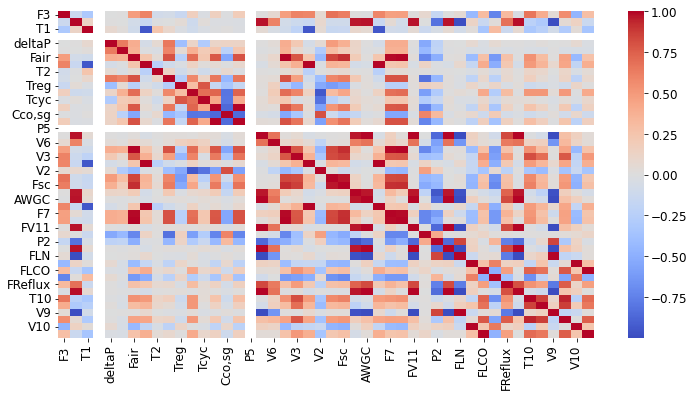

In [8]:
sns.heatmap(df_CAB_valveLeak.corr(),cmap='coolwarm')

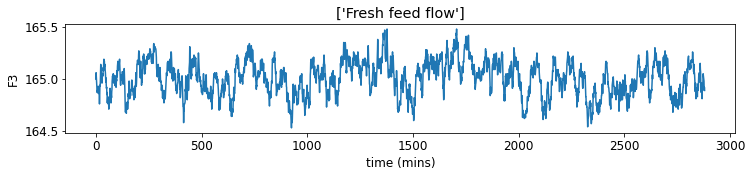

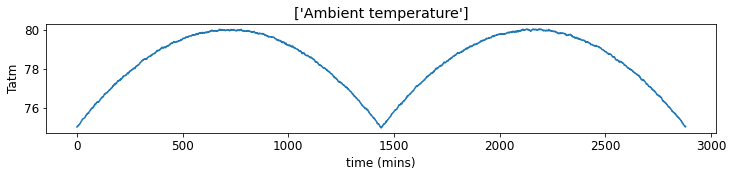

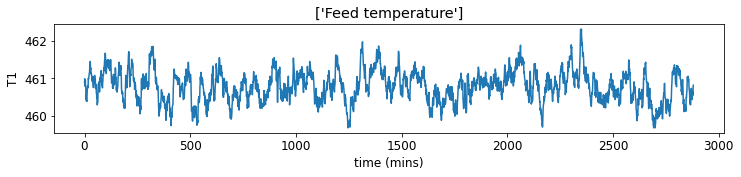

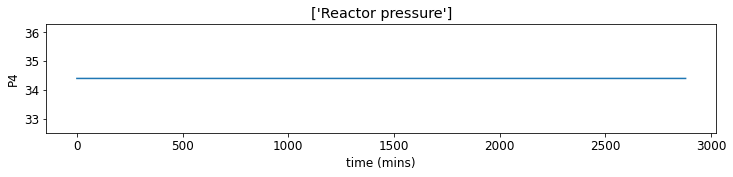

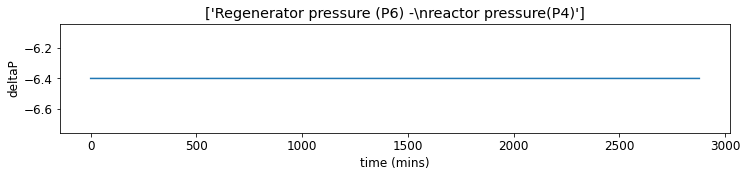

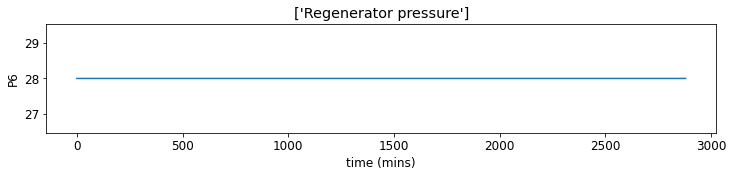

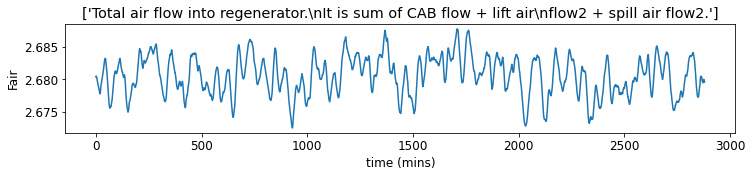

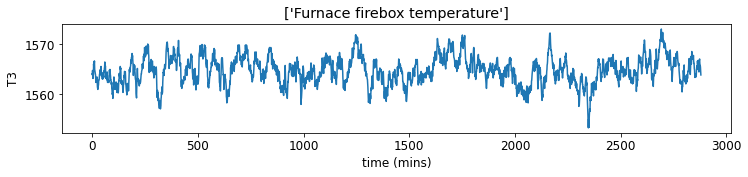

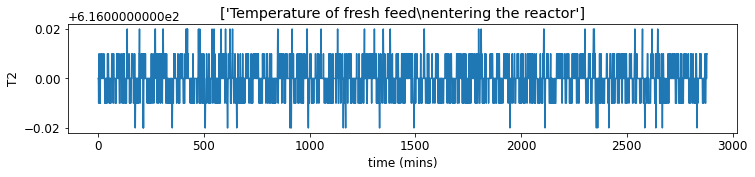

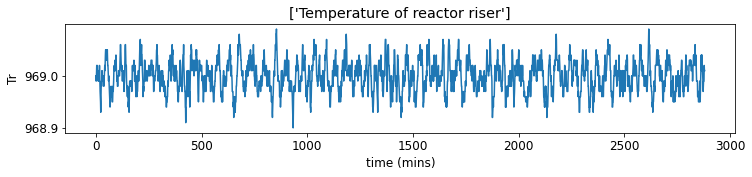

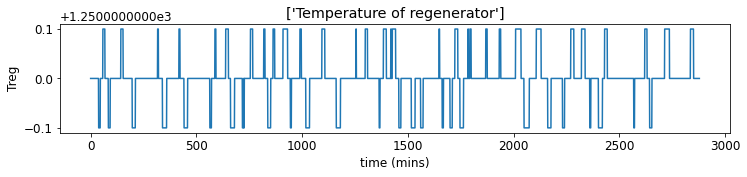

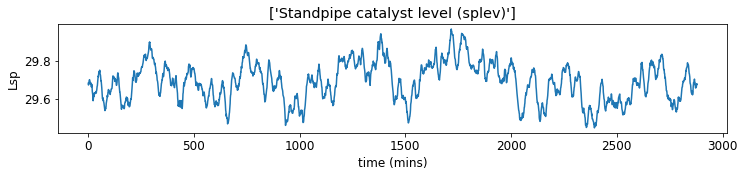

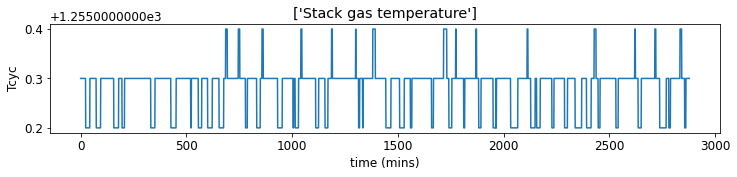

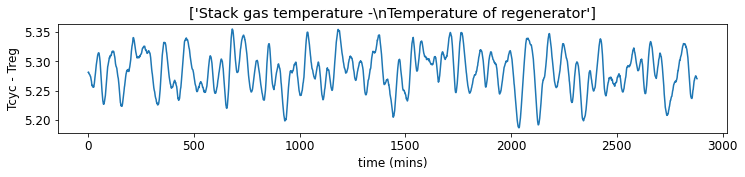

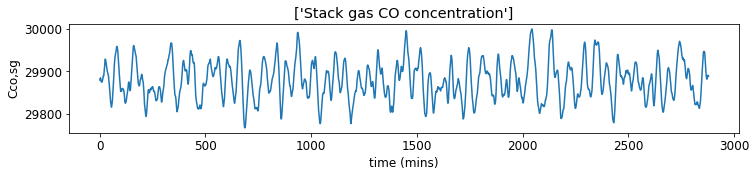

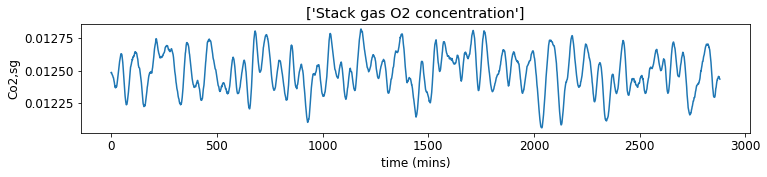

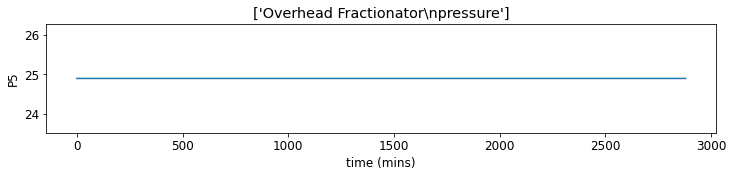

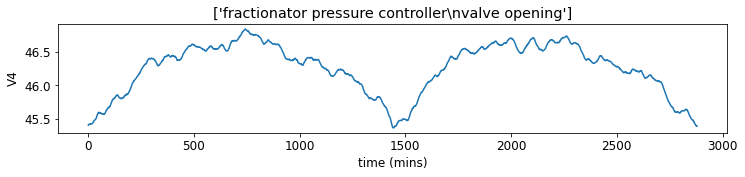

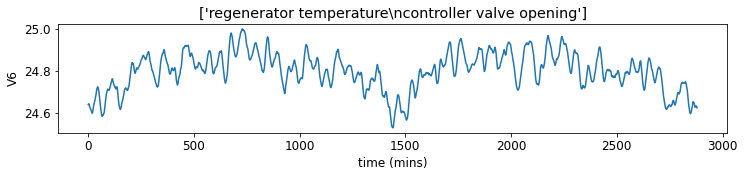

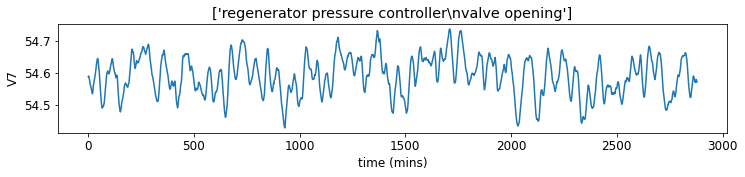

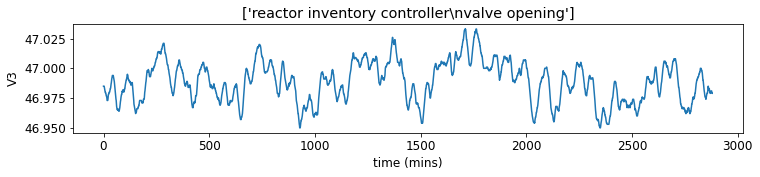

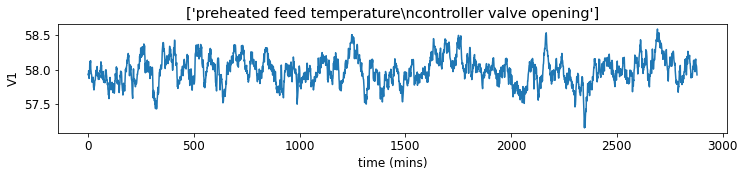

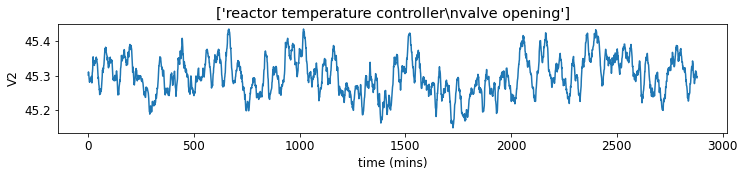

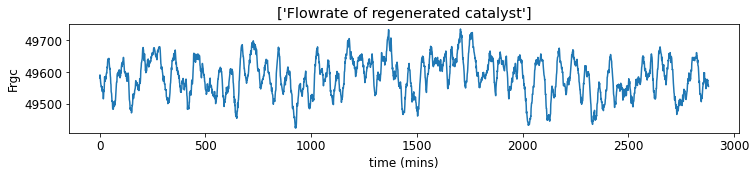

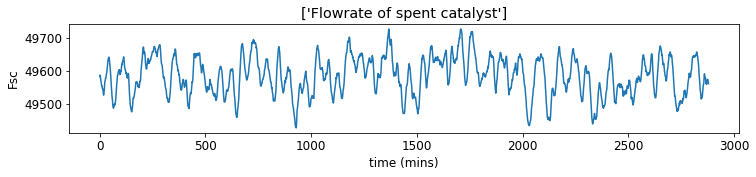

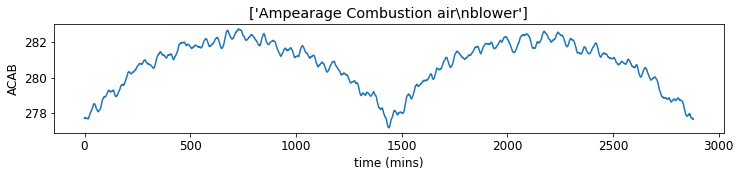

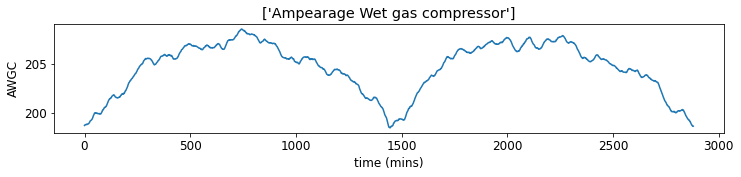

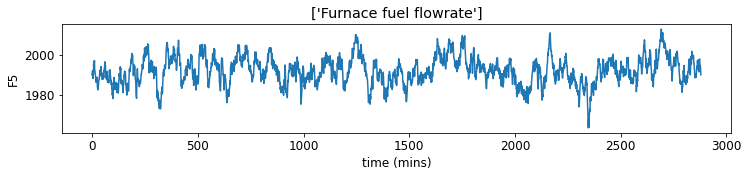

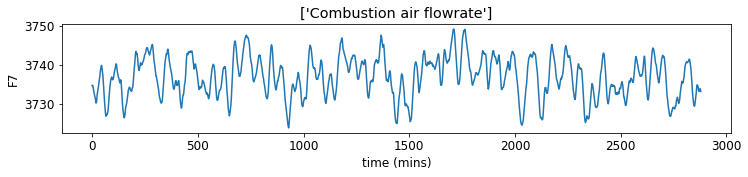

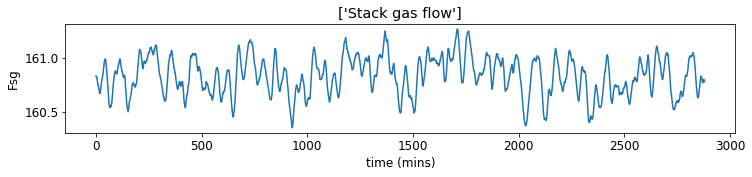

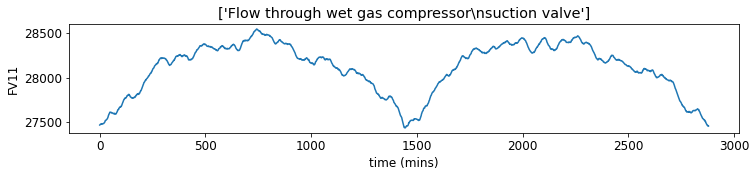

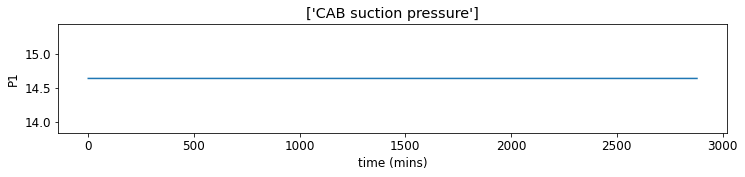

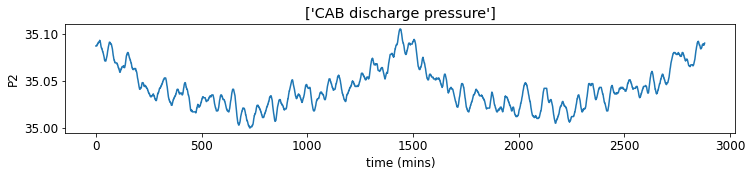

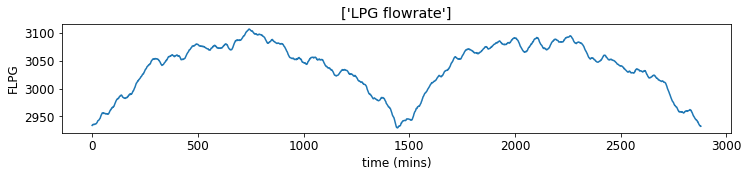

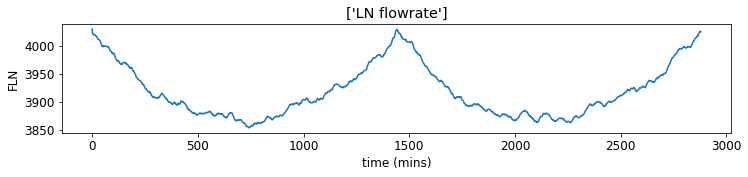

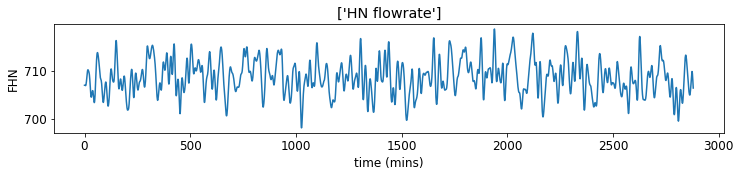

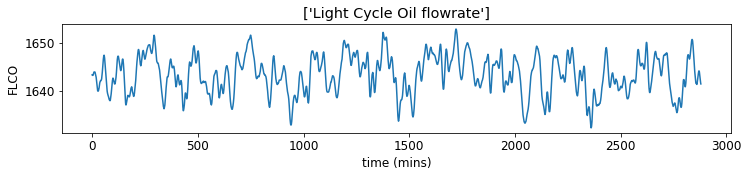

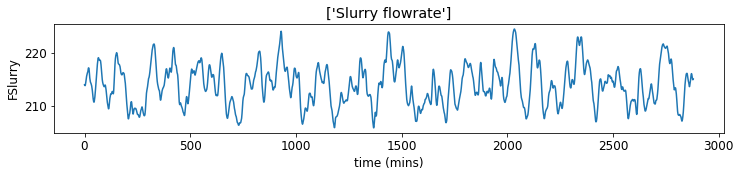

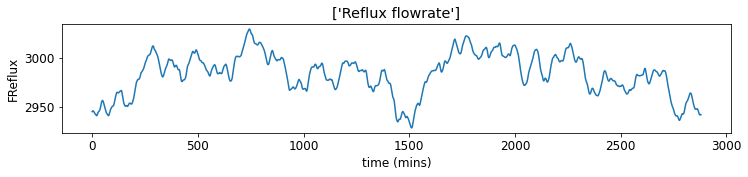

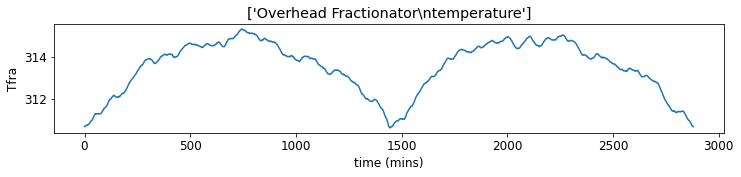

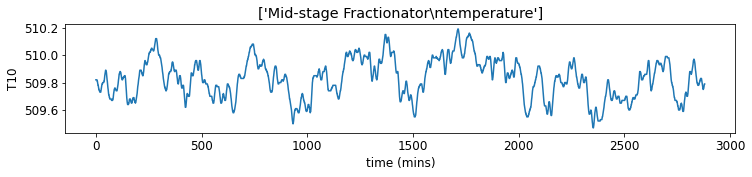

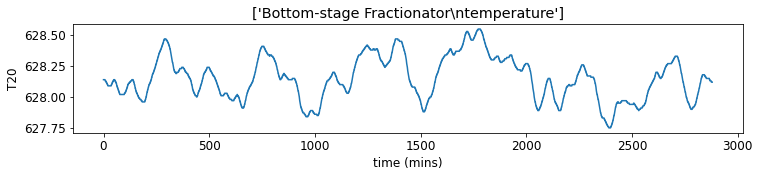

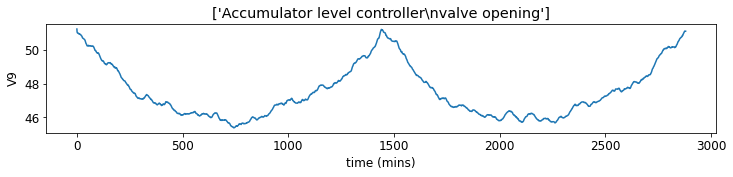

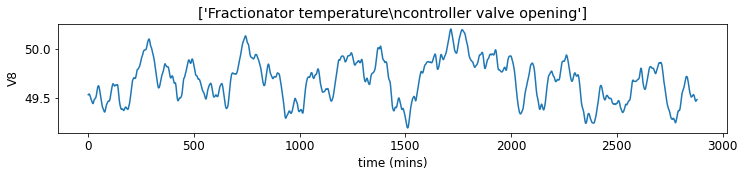

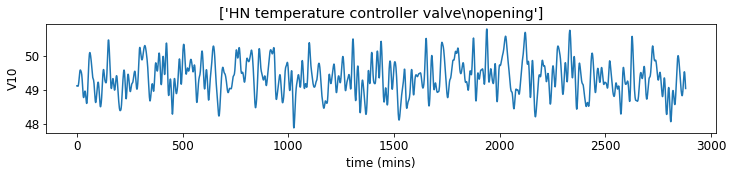

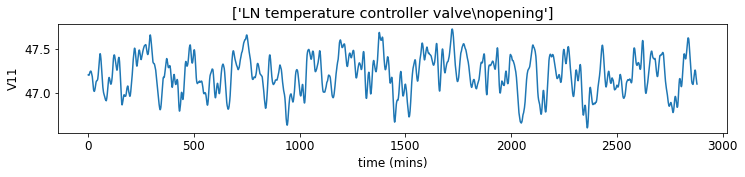

In [9]:
for n,i in enumerate(df_stableFeedFlow.columns):
    plt.figure(figsize=(12,2))
    plt.plot(df_stableFeedFlow[i])
    plt.xlabel('time (mins)')
    plt.ylabel(i)
    plt.title(df[df['Symbol']==i]['Description'].values)
    plt.show()

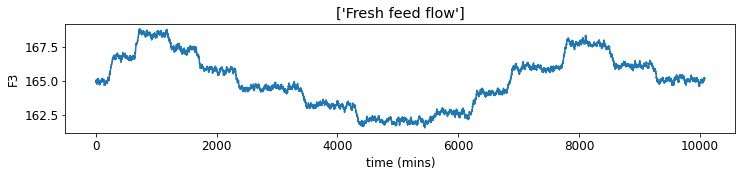

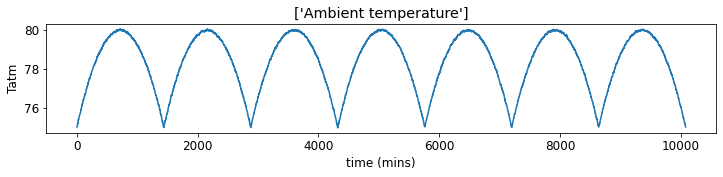

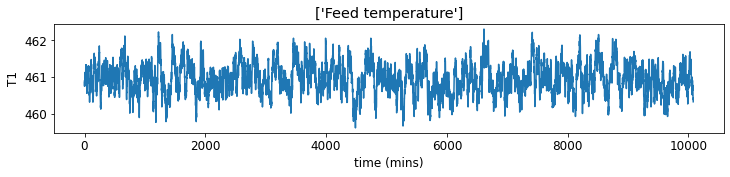

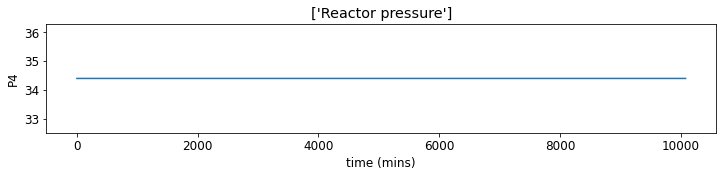

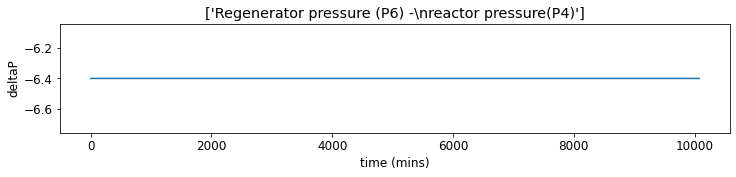

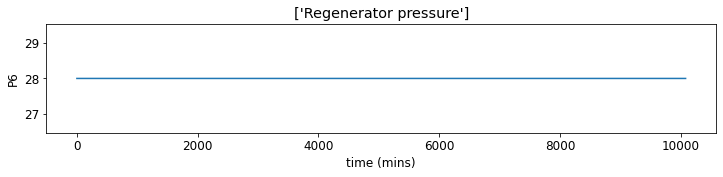

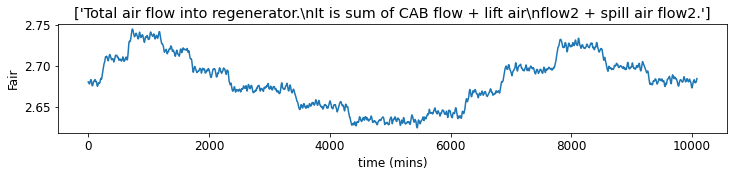

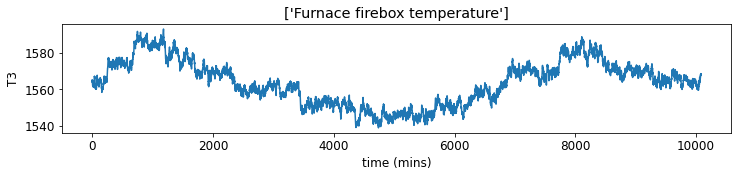

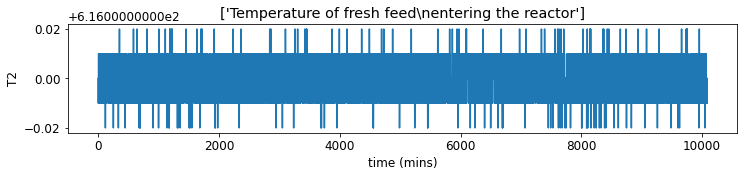

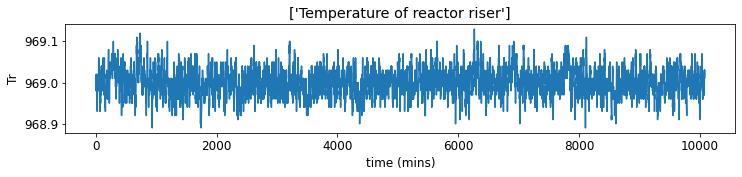

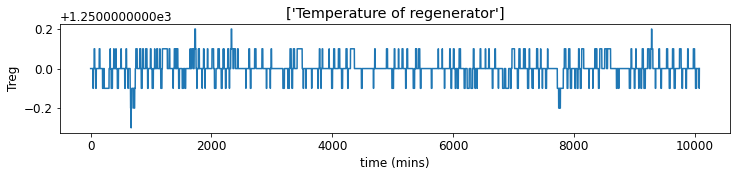

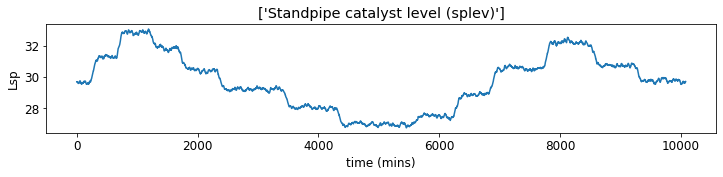

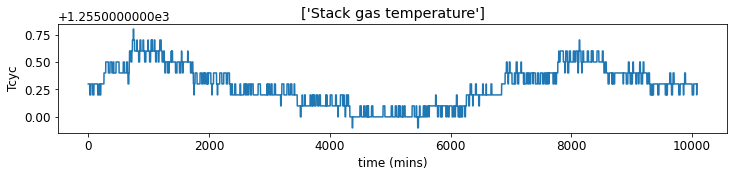

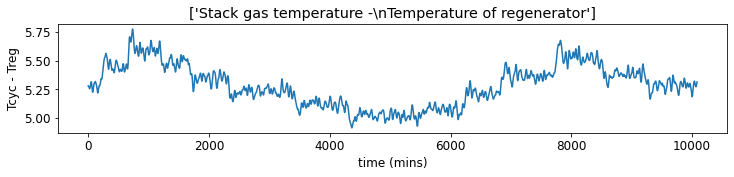

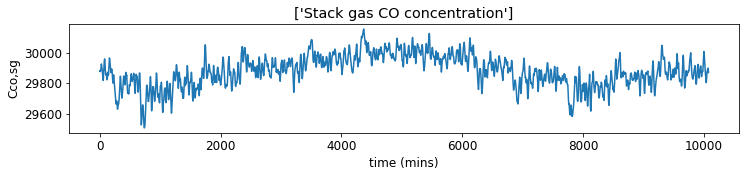

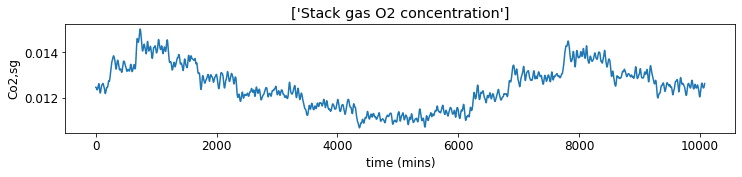

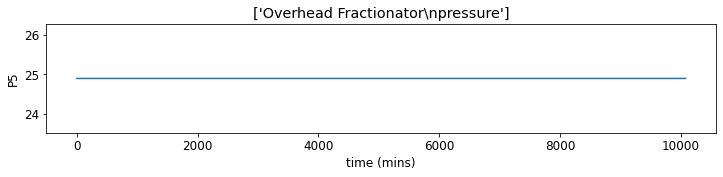

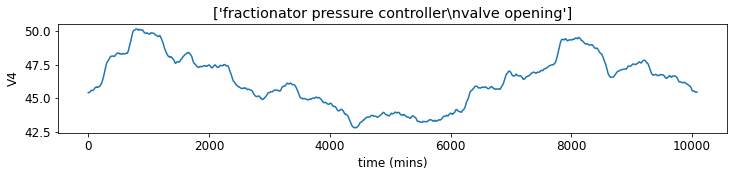

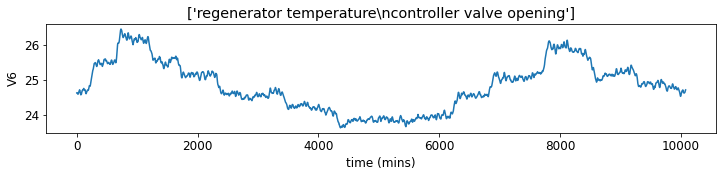

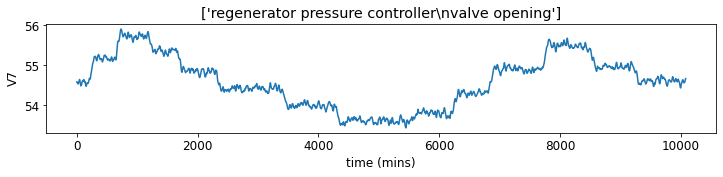

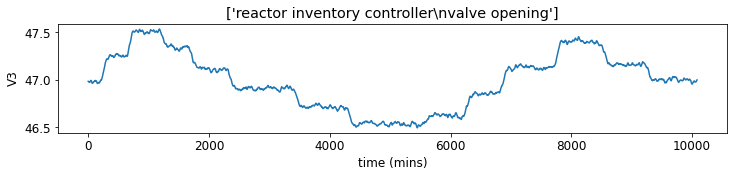

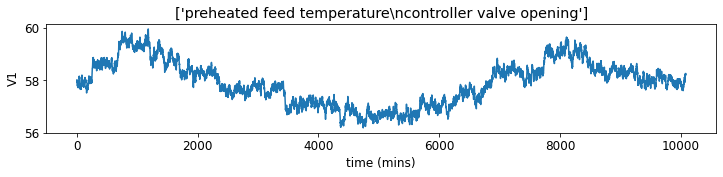

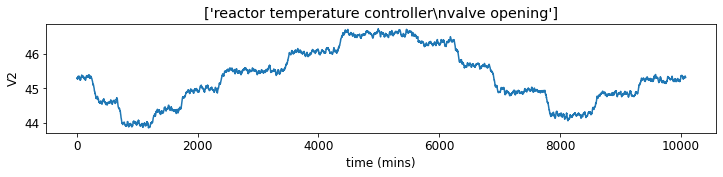

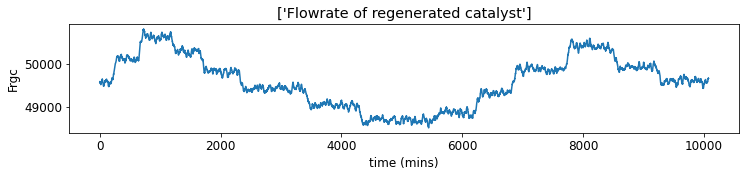

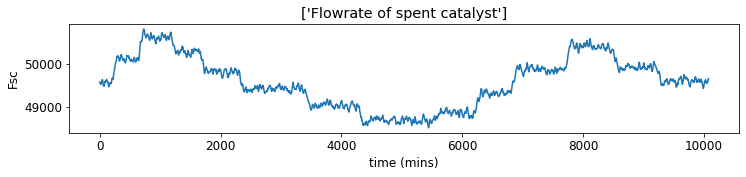

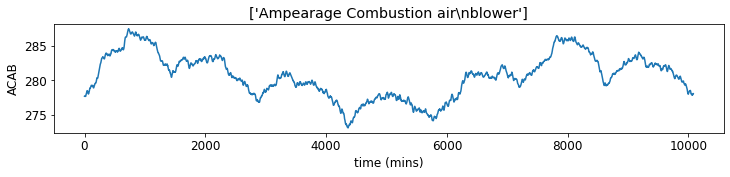

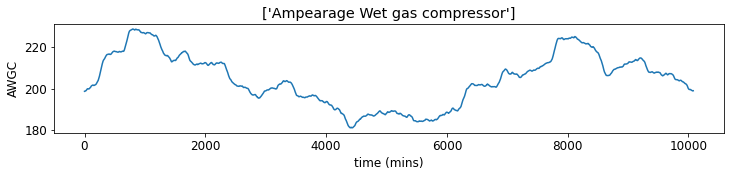

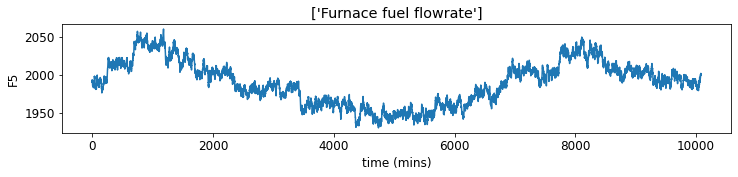

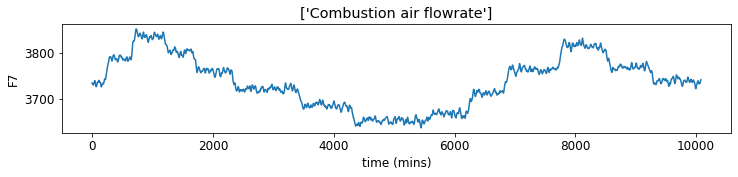

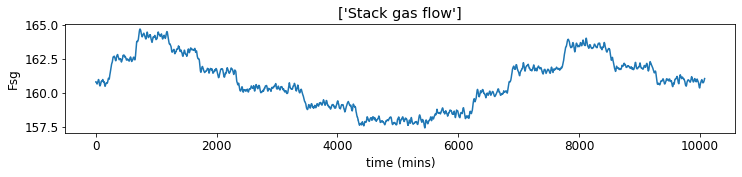

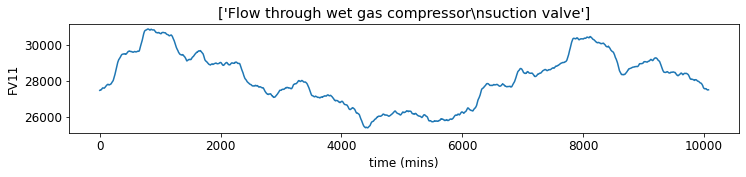

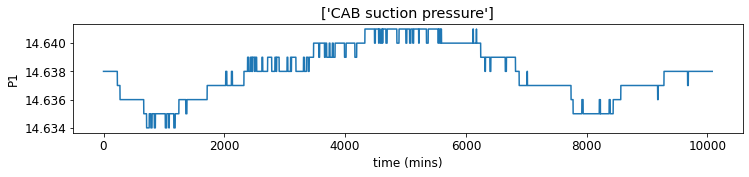

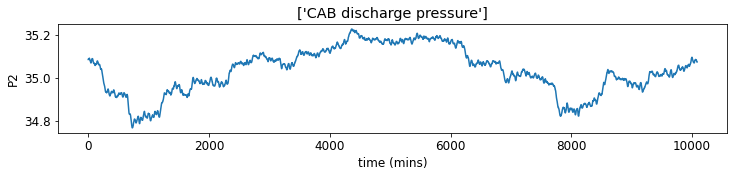

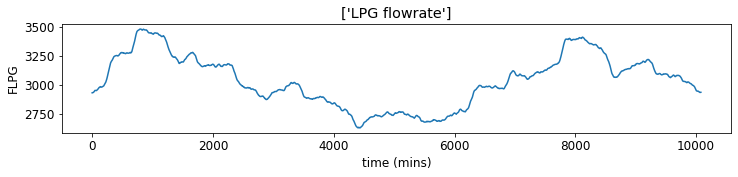

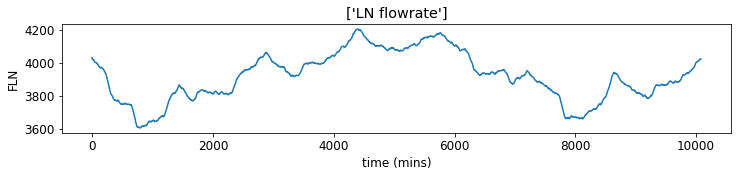

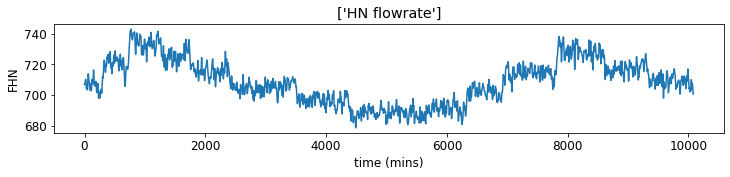

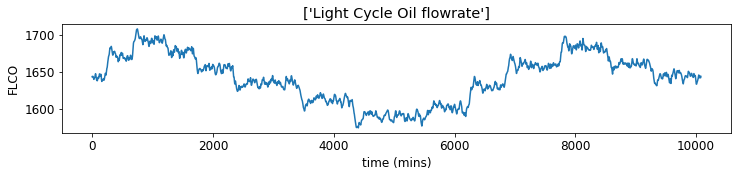

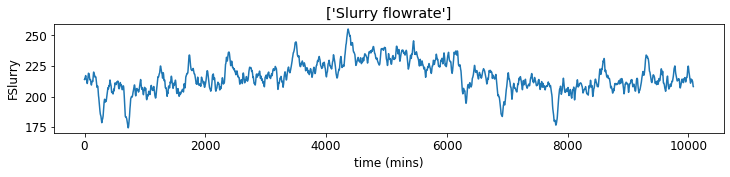

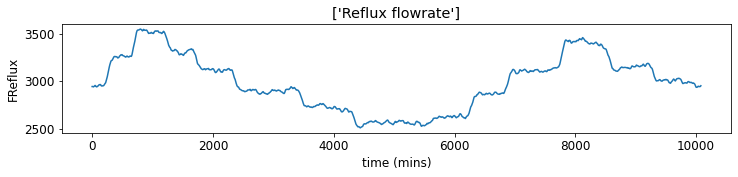

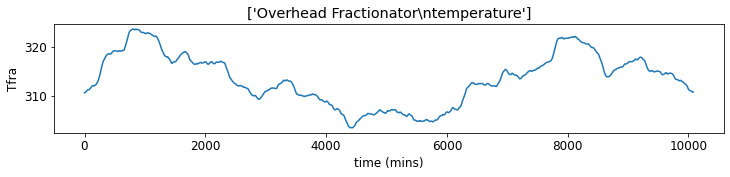

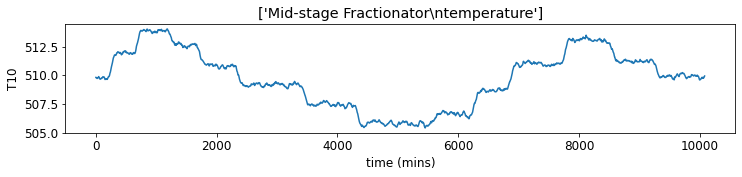

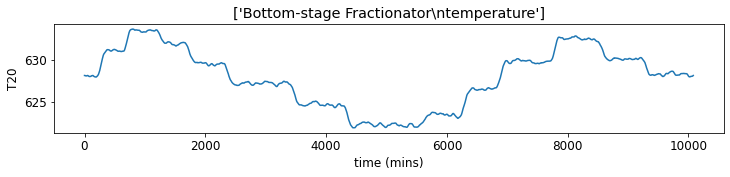

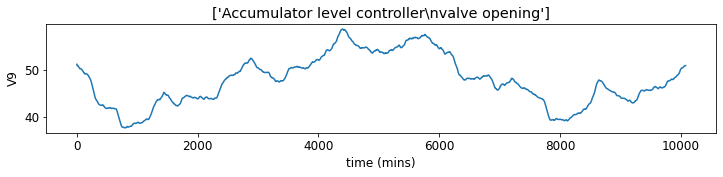

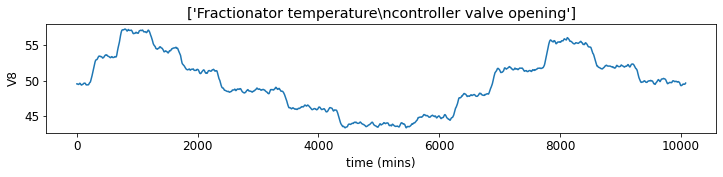

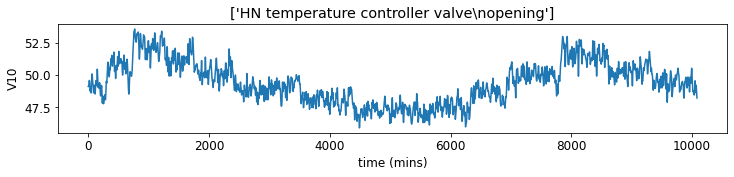

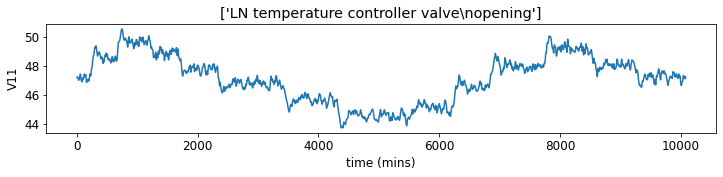

In [10]:
for n,i in enumerate(df_varyingFeedFlow.columns):
    plt.figure(figsize=(12,2))
    plt.plot(df_varyingFeedFlow[i])
    plt.xlabel('time (mins)')
    plt.ylabel(i)
    plt.title(df[df['Symbol']==i]['Description'].values)
    plt.show()

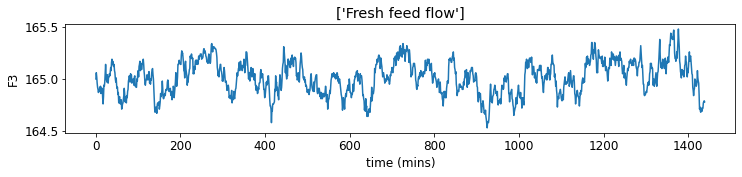

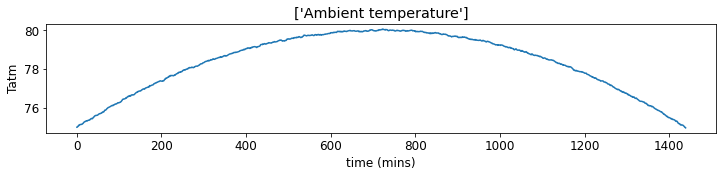

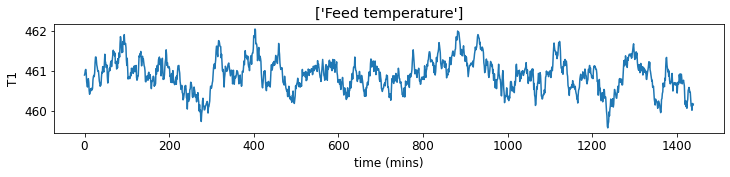

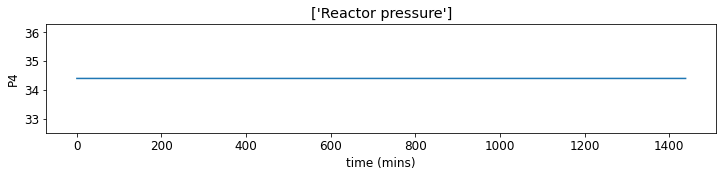

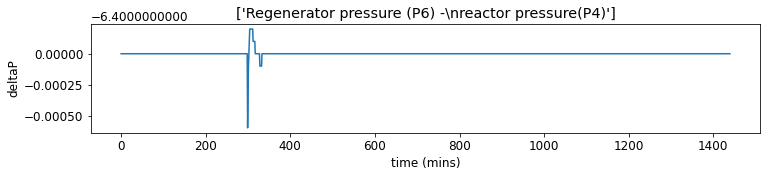

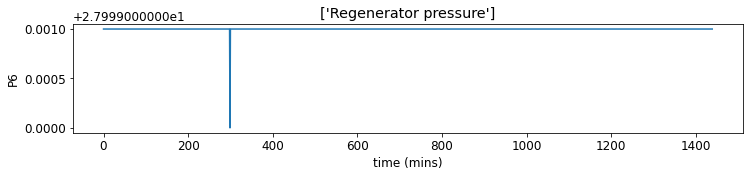

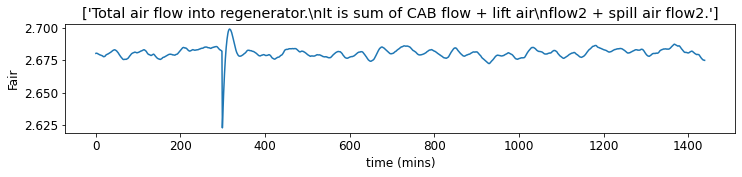

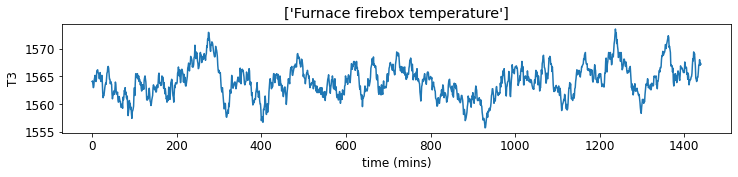

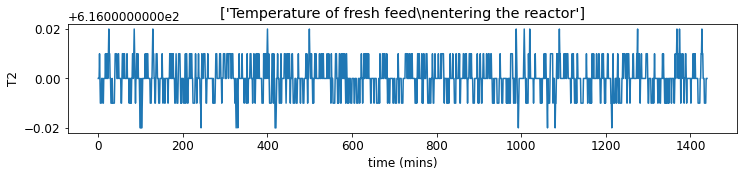

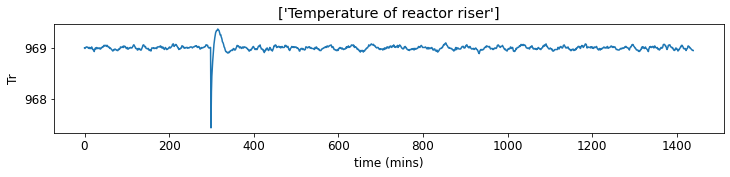

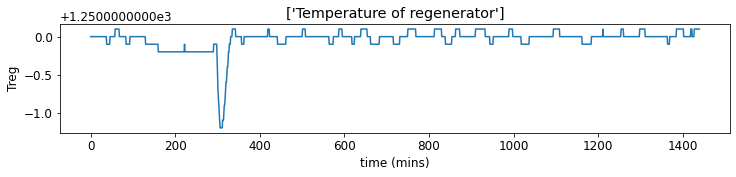

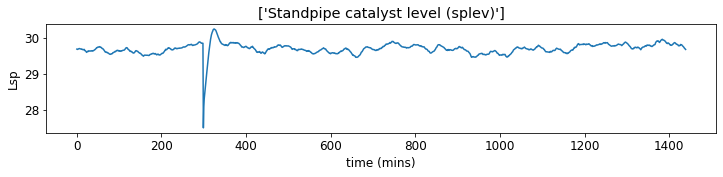

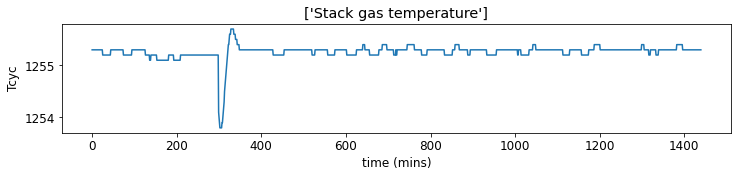

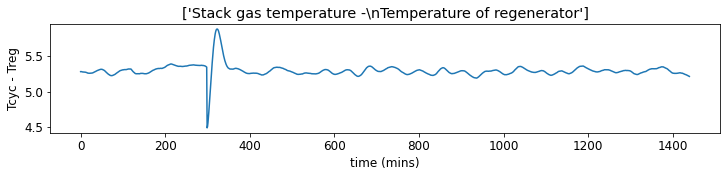

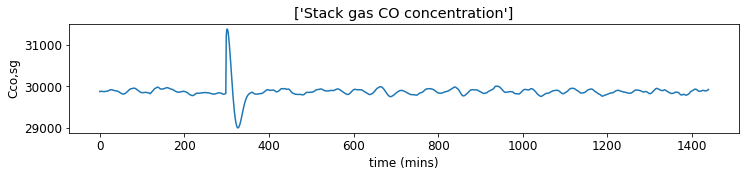

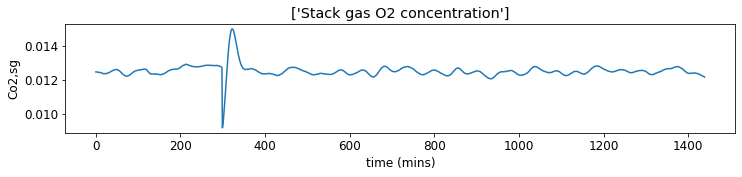

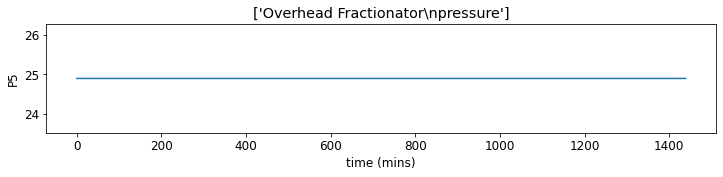

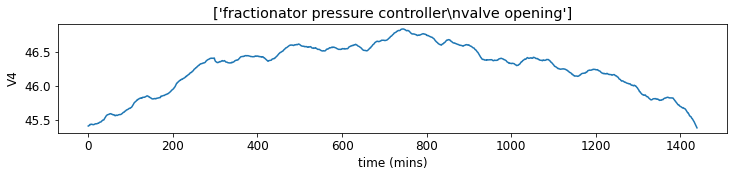

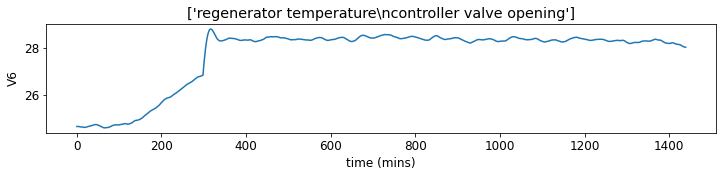

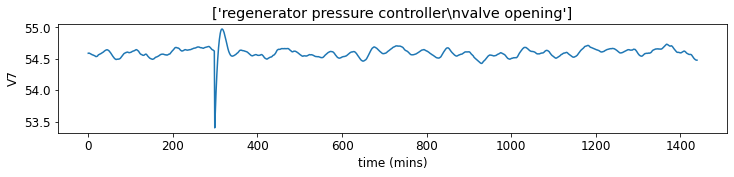

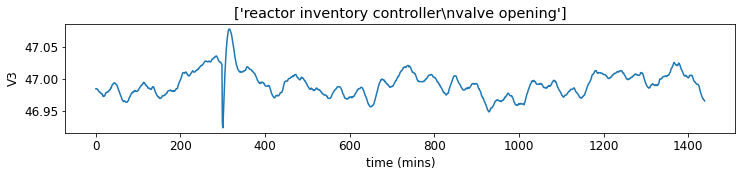

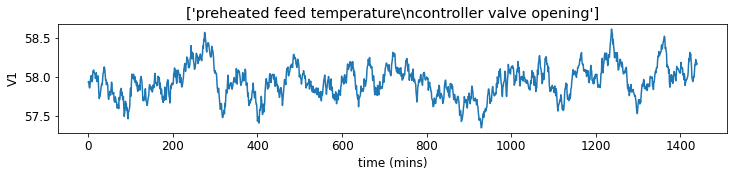

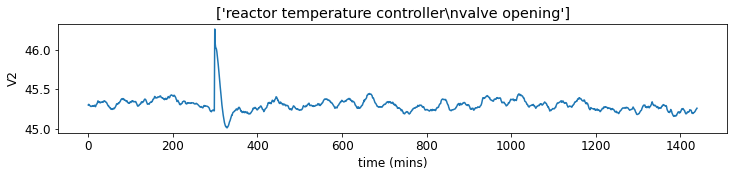

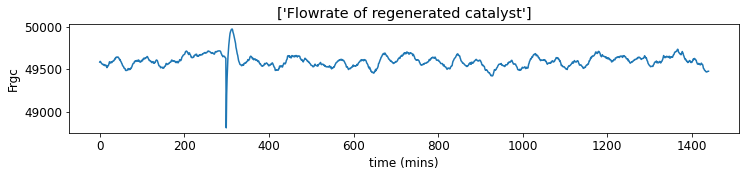

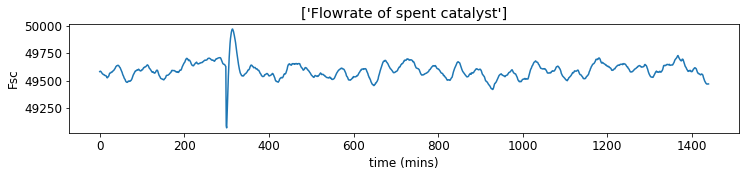

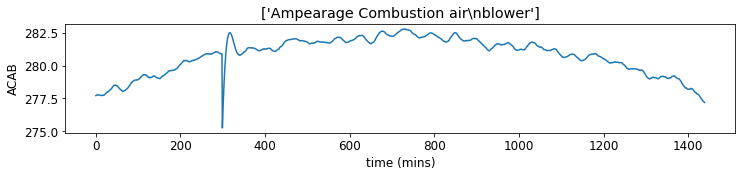

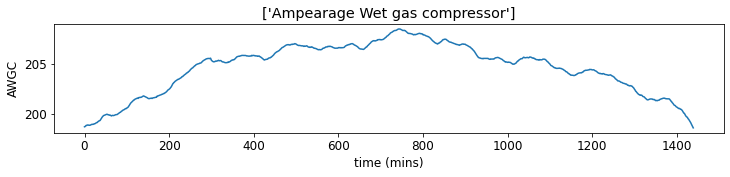

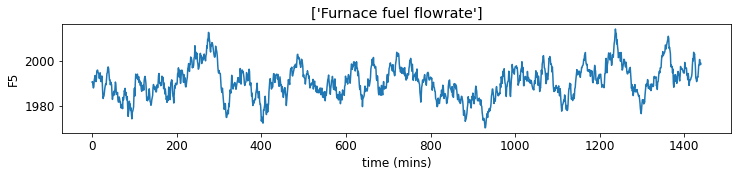

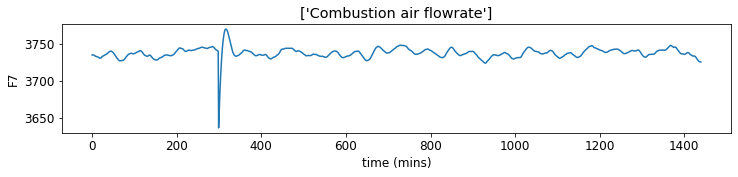

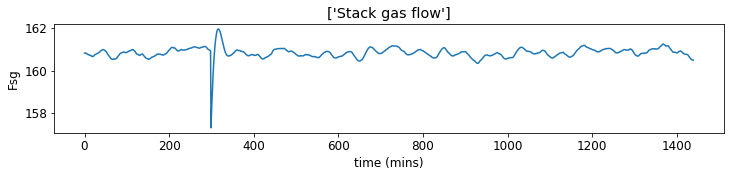

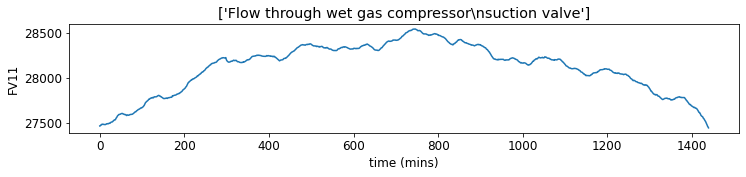

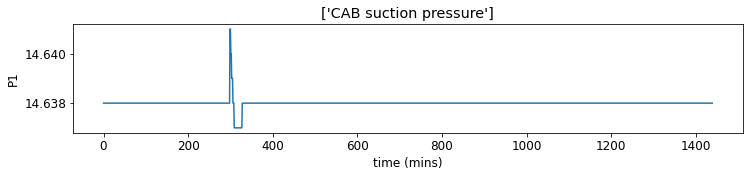

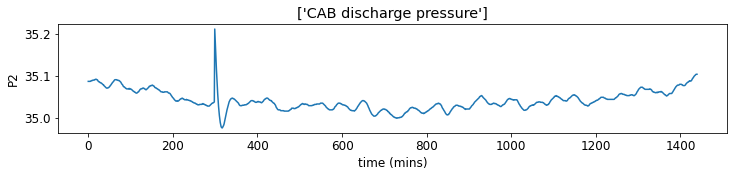

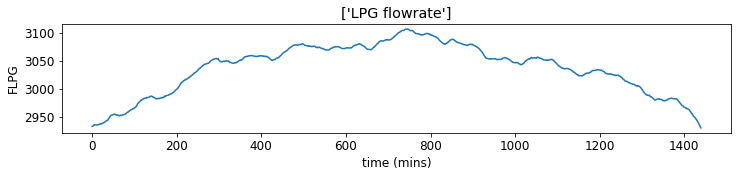

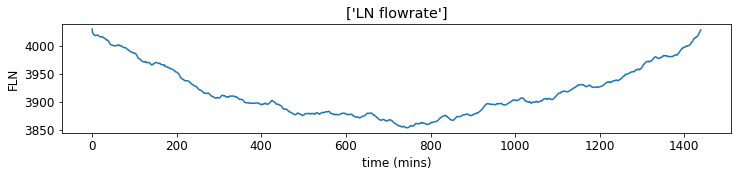

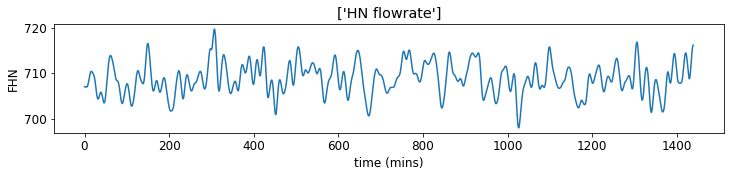

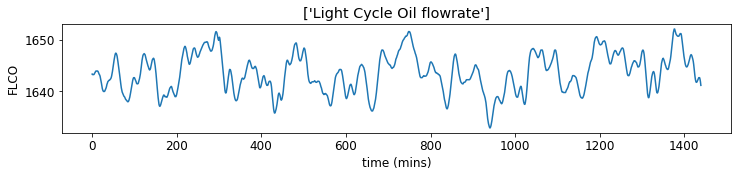

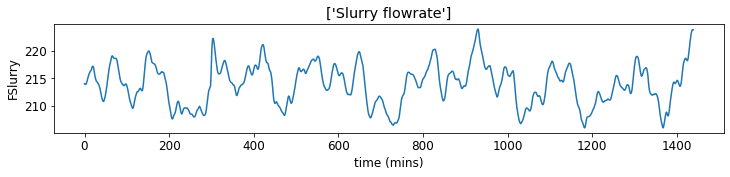

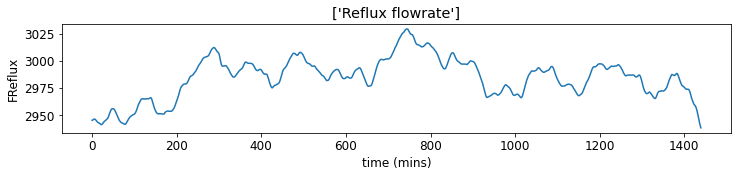

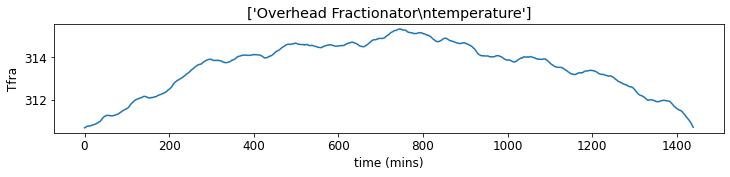

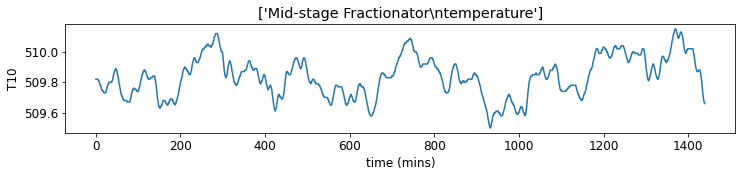

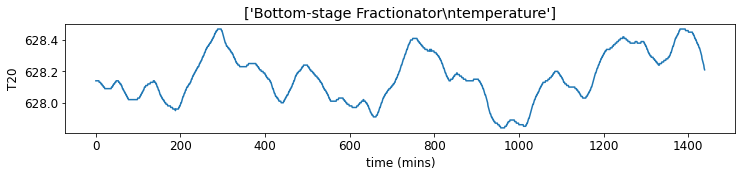

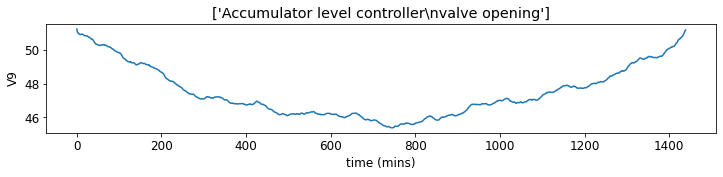

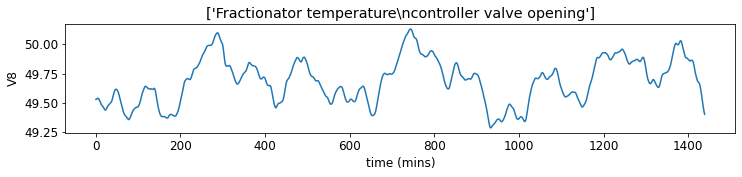

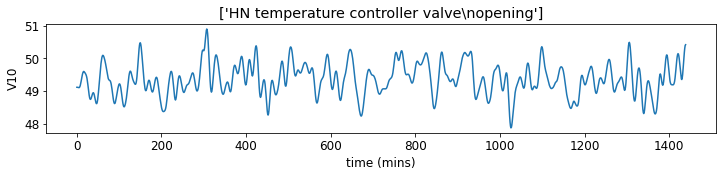

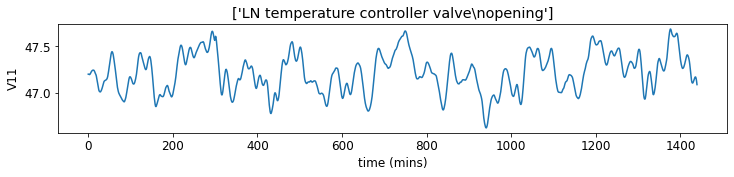

In [11]:
for n,i in enumerate(df_CAB_valveLeak.columns):
    plt.figure(figsize=(12,2))
    plt.plot(df_CAB_valveLeak[i])
    plt.xlabel('time (mins)')
    plt.ylabel(i)
    plt.title(df[df['Symbol']==i]['Description'].values)
    plt.show()

**Scaling the data with mean=0 & std = 1 using Standard Scalar.**

In [12]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [13]:
X = ss.fit_transform(df_stableFeedFlow)

**Applying PCA**

In [14]:
from sklearn.decomposition import PCA
pca = PCA()

In [15]:
X_pca = pca.fit_transform(X)

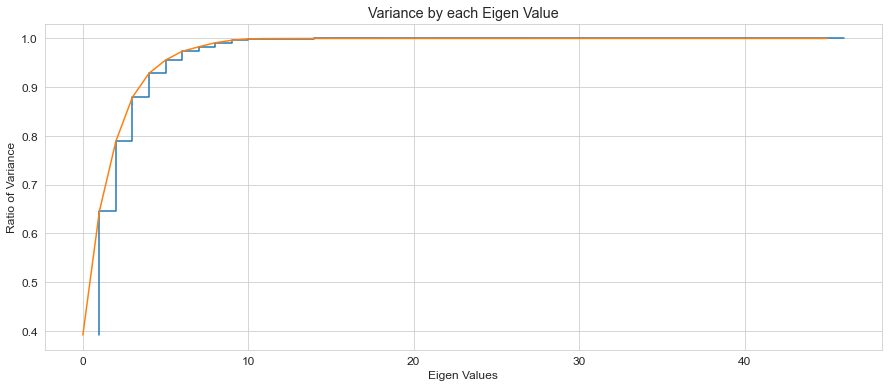

In [16]:
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.lineplot(x=list(range(1,47)), y=np.cumsum(pca.explained_variance_ratio_), drawstyle='steps-pre')
sns.lineplot(x=list(range(0,46)),y=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance')
plt.title('Variance by each Eigen Value')
plt.show()

It can be clearly seen than 10 dimentions can describe more than 98% data, hence redcing the feature space from 46 to 10.

In [17]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

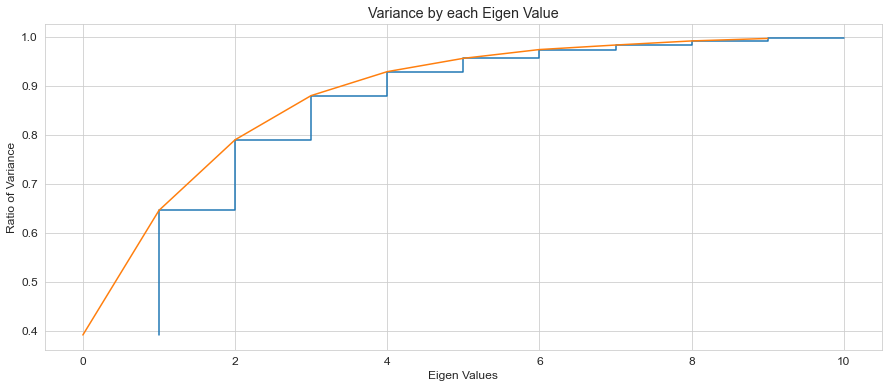

In [18]:
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.lineplot(x=list(range(1,11)), y=np.cumsum(pca.explained_variance_ratio_), drawstyle='steps-pre')
sns.lineplot(x=list(range(0,10)),y=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance')
plt.title('Variance by each Eigen Value')
plt.show()

**Applying Autoencoders**

In [19]:
X_train = X.reshape(2880,46,1)

Lets create a Sequential model with Bidirectional LSTM & train the model when plant is in steady state.<br>
To avoid overfitting of model by using 20% dropout.

In [20]:
# del model

In [21]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256,return_sequences=True),input_shape=(46,1)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 46, 512)           528384    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 46, 512)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 46, 256)           656384    
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 46, 256)           0         
                                                                 
 dense (Dense)               (None, 46, 1)             257       
                                                                 
Total params: 1185025 (4.52 MB)
Trainable params: 118502

In [22]:
model.fit(X_train,X_train,epochs=30)

Epoch 1/30
90/90 [==============================] - 91s 454ms/step - loss: 0.1532 - mae: 0.2189
Epoch 2/30
90/90 [==============================] - 41s 452ms/step - loss: 0.0032 - mae: 0.0397
Epoch 3/30
90/90 [==============================] - 39s 430ms/step - loss: 0.0026 - mae: 0.0349
Epoch 4/30
90/90 [==============================] - 39s 438ms/step - loss: 0.0023 - mae: 0.0324
Epoch 5/30
90/90 [==============================] - 39s 436ms/step - loss: 0.0021 - mae: 0.0310
Epoch 6/30
90/90 [==============================] - 41s 453ms/step - loss: 0.0020 - mae: 0.0298
Epoch 7/30
90/90 [==============================] - 40s 446ms/step - loss: 0.0019 - mae: 0.0288
Epoch 8/30
90/90 [==============================] - 41s 454ms/step - loss: 0.0018 - mae: 0.0282
Epoch 9/30
90/90 [==============================] - 62s 695ms/step - loss: 0.0018 - mae: 0.0277
Epoch 10/30
90/90 [==============================] - 62s 691ms/step - loss: 0.0017 - mae: 0.0273
Epoch 11/30
90/90 [====================

**Calculating the Reconstruction error using MAE.**<br>
Considering 99 percentile of error as an acceptable range, and it signifies the steady state operation.

In [23]:
error_ae = []
for i in range(X.shape[0]):
    y_pred = model.predict(X[i].reshape(1,46,1),verbose=None)[0,:,0]
    error_ae.append(np.abs(X[i]-y_pred).sum())
AE_CL = np.percentile(error_ae,99)

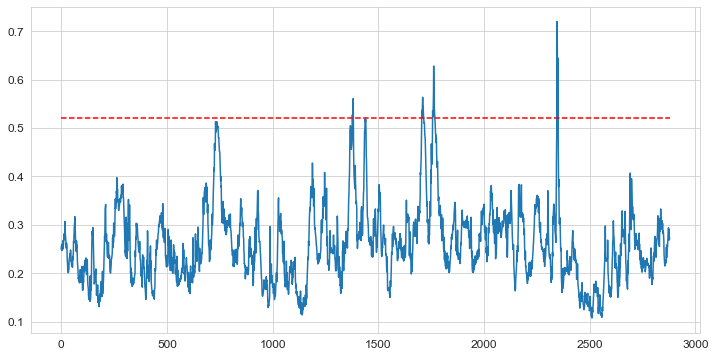

In [24]:
pd.Series(error_ae).plot()
plt.hlines(AE_CL,0,len(error_ae),colors='red',linestyles='--')

**Calculating the Reconstruction error using Q-test, T22-test & Cosine similarity.**<br>
Considering 99 percentile of error as an acceptable range, and it signifies the steady state operation.

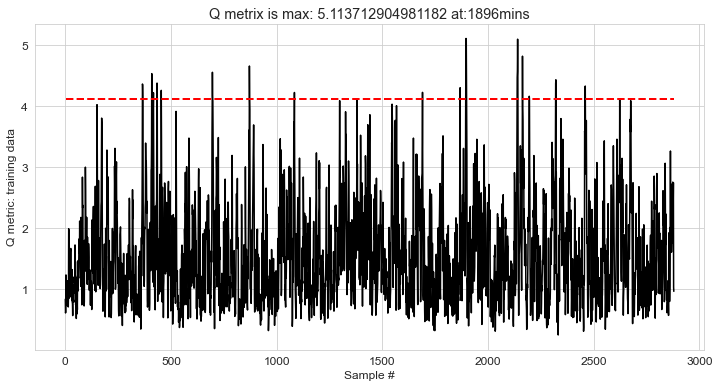

In [25]:
X_reconstructed = np.dot(X_pca,pca.components_)
error_pca = X-X_reconstructed
Q_train = np.sum(np.abs(error_pca),axis=1)
Q_CL = np.percentile(Q_train,99)
# Q_train plot with CL
plt.figure()
plt.plot(Q_train, color='black')
plt.plot([1,len(Q_train)],[Q_CL,Q_CL], linestyle='--',color='red', linewidth=2)
plt.xlabel('Sample #')
plt.ylabel('Q metric: training data')
plt.title(f'Q metrix is max: {Q_train.max()} at:{Q_train.argmax()}mins')
plt.show()

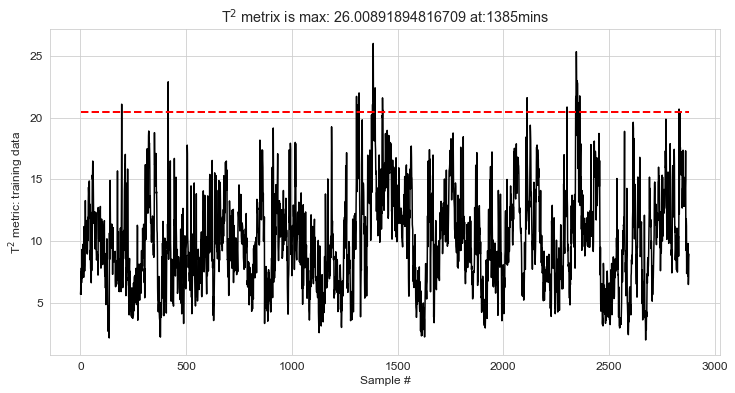

In [26]:
lambda_ = np.diag(pca.explained_variance_)
lambda_inv = np.linalg.inv(lambda_)
T_train = np.zeros(X_pca.shape[0])
for i in range(X_pca.shape[0]):
    T_train[i] = np.dot(np.dot(X_pca[i],lambda_inv),X_pca[i].T)
T_CL = np.percentile(T_train,99)
# T2_train plot with CL
plt.figure()
plt.plot(T_train, color='black')
plt.plot([1,len(T_train)],[T_CL,T_CL], linestyle='--',color='red', linewidth=2)
plt.xlabel('Sample #')
plt.ylabel('T$^2$ metric: training data')
plt.title(f'T$^2$ metrix is max: {np.array(T_train).max()} at:{np.array(T_train).argmax()}mins')
plt.show()

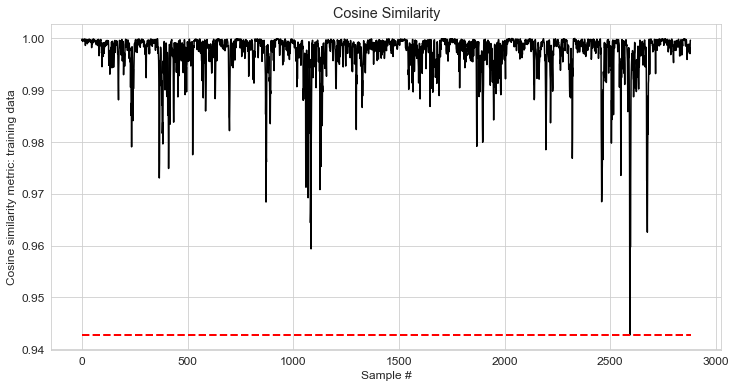

In [27]:
cosine = []
ed = []
for i in range(X.shape[0]):
    v1 = X[i]
    v2 = np.dot(X_pca,pca.components_)[i]
    cosine.append(np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2)))
    ed.append(np.linalg.norm(v1 - v2))
C_CL = np.min(cosine)
E_CL = np.percentile(ed,99)
# pd.Series(ed).plot(color='black')
# plt.plot([1,len(ed)],[E_CL,E_CL], linestyle='--',color='red', linewidth=2)
# plt.show()
pd.Series(cosine).plot(color='black')
plt.plot([1,len(cosine)],[C_CL,C_CL], linestyle='--',color='red', linewidth=2)
plt.xlabel('Sample #')
plt.ylabel('Cosine similarity metric: training data')
plt.title(f'Cosine Similarity')
plt.show()

In [28]:
Q_CL,T_CL,C_CL,E_CL,AE_CL

(4.123113215519078,
 20.4243503525688,
 0.9427550112367165,
 0.9281694746755794,
 0.519705396459442)

Let's create a function for test data preprocessing and testing the data with our model.

In [29]:
def Q_test(X,X_pca,pca_components_,Q_CL):
    X_reconstructed = np.dot(X_pca,pca_components_)
    error_pca = X-X_reconstructed
    Q_train = np.sum(np.abs(error_pca),axis=1)
    # Q_train plot with CL
    plt.figure()
    plt.plot(Q_train, color='black')
    plt.plot([1,len(Q_train)],[Q_CL,Q_CL], linestyle='--',color='red', linewidth=2)
    plt.xlabel('Sample #')
    plt.ylabel('Q metric: training data')
    plt.title(f'Q metrix is max: {Q_train.max()} at:{Q_train.argmax()}mins')
    plt.show()
    return error_pca

In [30]:
def T_test(X_pca,explained_variance_,TCL):
    lambda_ = np.diag(pca.explained_variance_)
    lambda_inv = np.linalg.inv(lambda_)
    T_train = np.zeros(X_pca.shape[0])
    for i in range(X_pca.shape[0]):
        T_train[i] = np.dot(np.dot(X_pca[i],lambda_inv),X_pca[i].T)
    # T2_train plot with CL
    plt.figure()
    plt.plot(T_train, color='black')
    plt.plot([1,len(T_train)],[T_CL,T_CL], linestyle='--',color='red', linewidth=2)
    plt.xlabel('Sample #')
    plt.ylabel('T$^2$ metric: training data')
    plt.title(f'T$^2$ metrix is max: {np.array(T_train).max()} at:{np.array(T_train).argmax()}mins')
    plt.show()

In [31]:
def cosine(X,X_transformed,pca_components_,C_CL,E_CL):
    cosine = []
    ed = []
    for i in range(X.shape[0]):
        v1 = X[i]
        v2 = np.dot(X_transformed,pca_components_)[i]
        cosine.append(np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2)))
        ed.append(np.linalg.norm(v1 - v2))
#     pd.Series(ed).plot(color='black')
#     plt.plot([1,len(ed)],[E_CL,E_CL], linestyle='--',color='red', linewidth=2)
#     plt.xlabel('Sample #')
#     plt.ylabel('Eucledian Distance metric: training data')
#     plt.show()
    pd.Series(cosine).plot(color='black')
    plt.plot([1,len(cosine)],[C_CL,C_CL], linestyle='--',color='red', linewidth=2)
    plt.xlabel('Sample #')
    plt.ylabel('Cosine similarity metric: training data')
    plt.title(f'Cosine Similarity')
    plt.show()

In [32]:
def autoencoder(df_test,CL):
    X_test = ss.transform(df_test)
    error_ae = []
    error_sum = []
    for i in range(X_test.shape[0]):
        y_pred = model.predict(X_test[i].reshape(1,46,1),verbose=None)[0,:,0]
        error_ae.append(np.abs(X_test[i]-y_pred))
        error_sum.append(np.abs(X_test[i]-y_pred).sum())
    error_ae=np.array(error_ae)
    pd.Series(error_sum).plot(color = 'black')
    plt.hlines(CL,0,len(error_ae),colors='red',linestyles='--')
    plt.xlabel('Sample #')
    plt.ylabel('Reconstruction error by Autoencoder')
    return error_ae

## **Testing the model on Varying feed flow rate.**

In [33]:
X = ss.transform(df_varyingFeedFlow)
X_test = pca.transform(X)

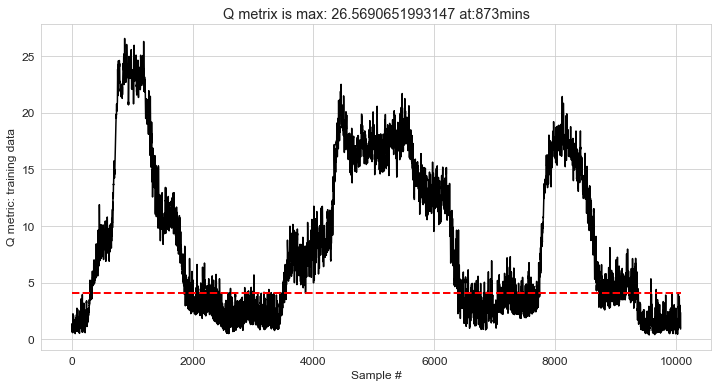

In [34]:
error_pca = Q_test(X,X_test,pca.components_,Q_CL)

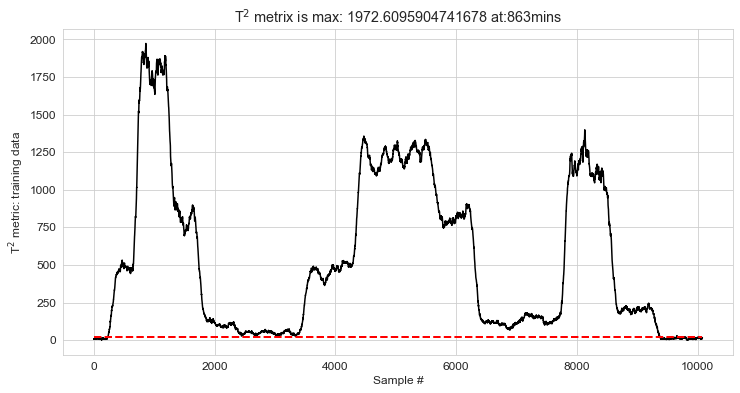

In [35]:
T_test(X_test,pca.explained_variance_,T_CL)

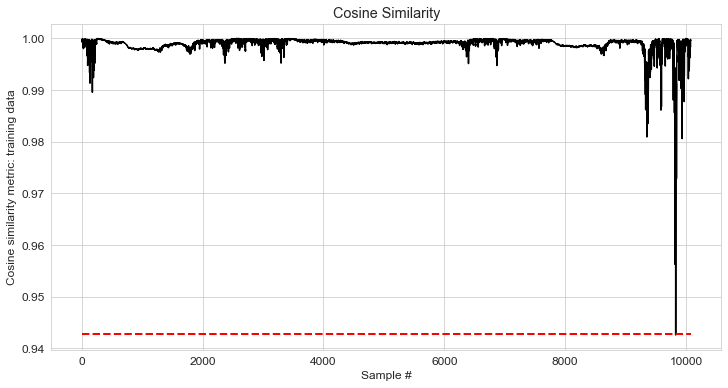

In [36]:
cosine(X,X_test,pca.components_,C_CL,E_CL)

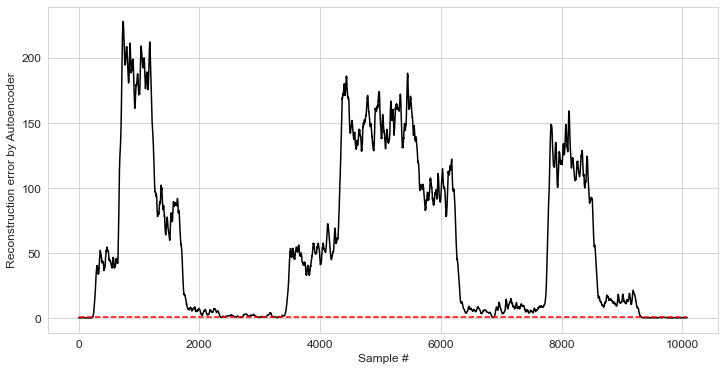

In [37]:
error_ae = autoencoder(df_varyingFeedFlow,AE_CL)

## **Testing the model on abnormal dataset.**

In [38]:
X = ss.transform(df_CAB_valveLeak)
X_test = pca.transform(X)

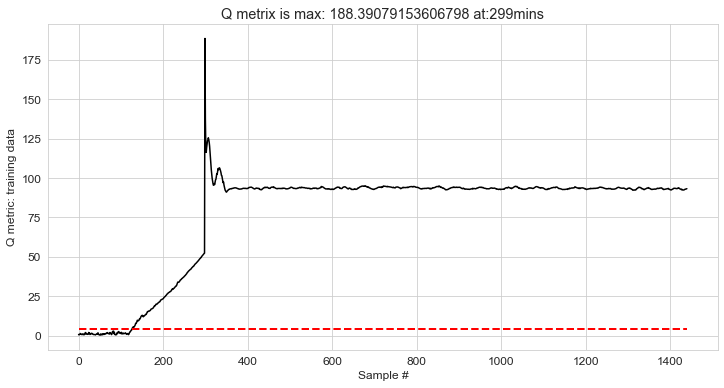

In [39]:
error_pca = Q_test(X,X_test,pca.components_,Q_CL)

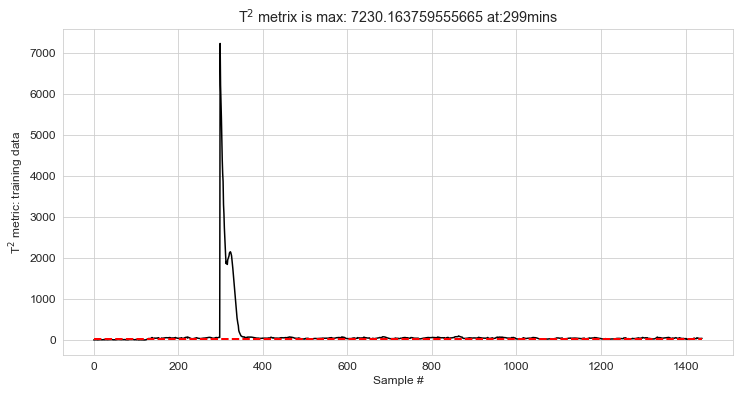

In [40]:
T_test(X_test,pca.explained_variance_,T_CL)

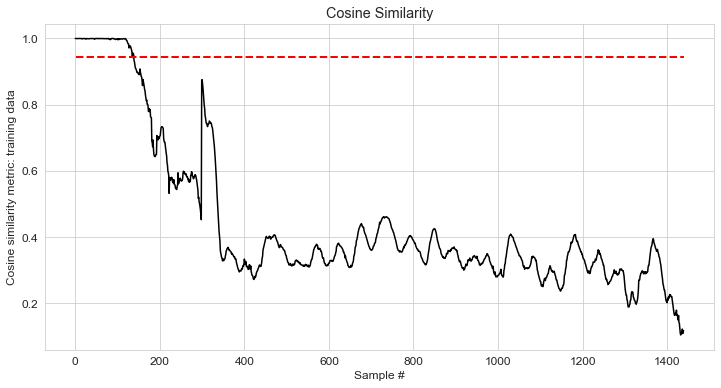

In [41]:
cosine(X,X_test,pca.components_,C_CL,E_CL)

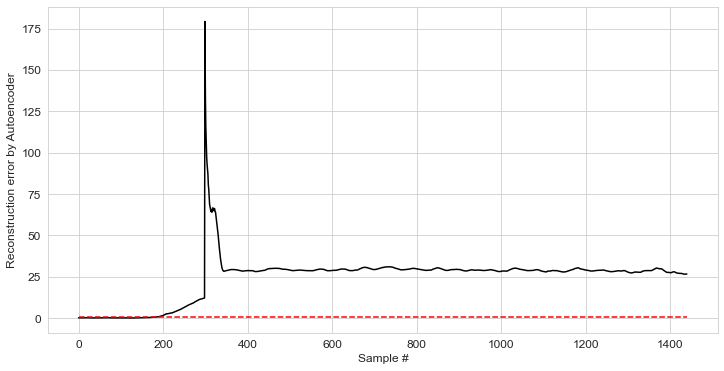

In [42]:
error_ae = autoencoder(df_CAB_valveLeak,AE_CL)

**Inference**<br>
During steady state operation the errors are within limit but, suddenly the error starts increasing after 150 mins.<br>
So, let’s check which parameters are deviating maximum form steady state.<br>
Considering top 10 variables responsible for plant deviation.

## **Visualization**

Time- 299 mins


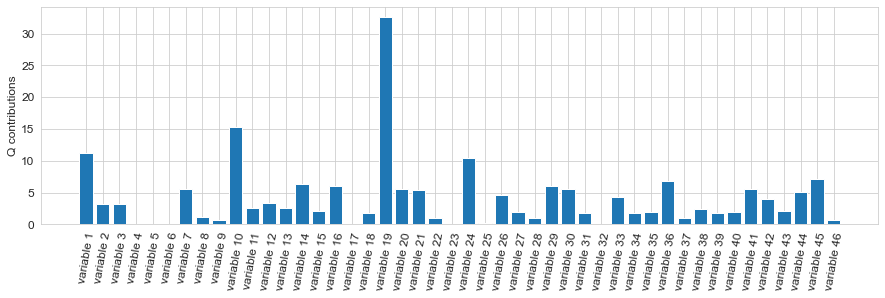

In [43]:
#%% Q contribution
sample = sample = ((pd.Series(error_pca.sum(axis=1))-pd.Series(error_pca.sum(axis=1)).shift()).abs()).argmax()
print('Time-',sample,'mins')
error_test_sample = error_pca[sample]
Q_contri = np.abs(error_test_sample) # *error_test_sample # vector of contributions

plt.figure(figsize=[15,4])
plt.bar(['variable ' + str((i+1)) for i in range(len(Q_contri))], Q_contri)
plt.xticks(rotation = 80)
plt.ylabel('Q contributions')
plt.show()

Time- 299 mins


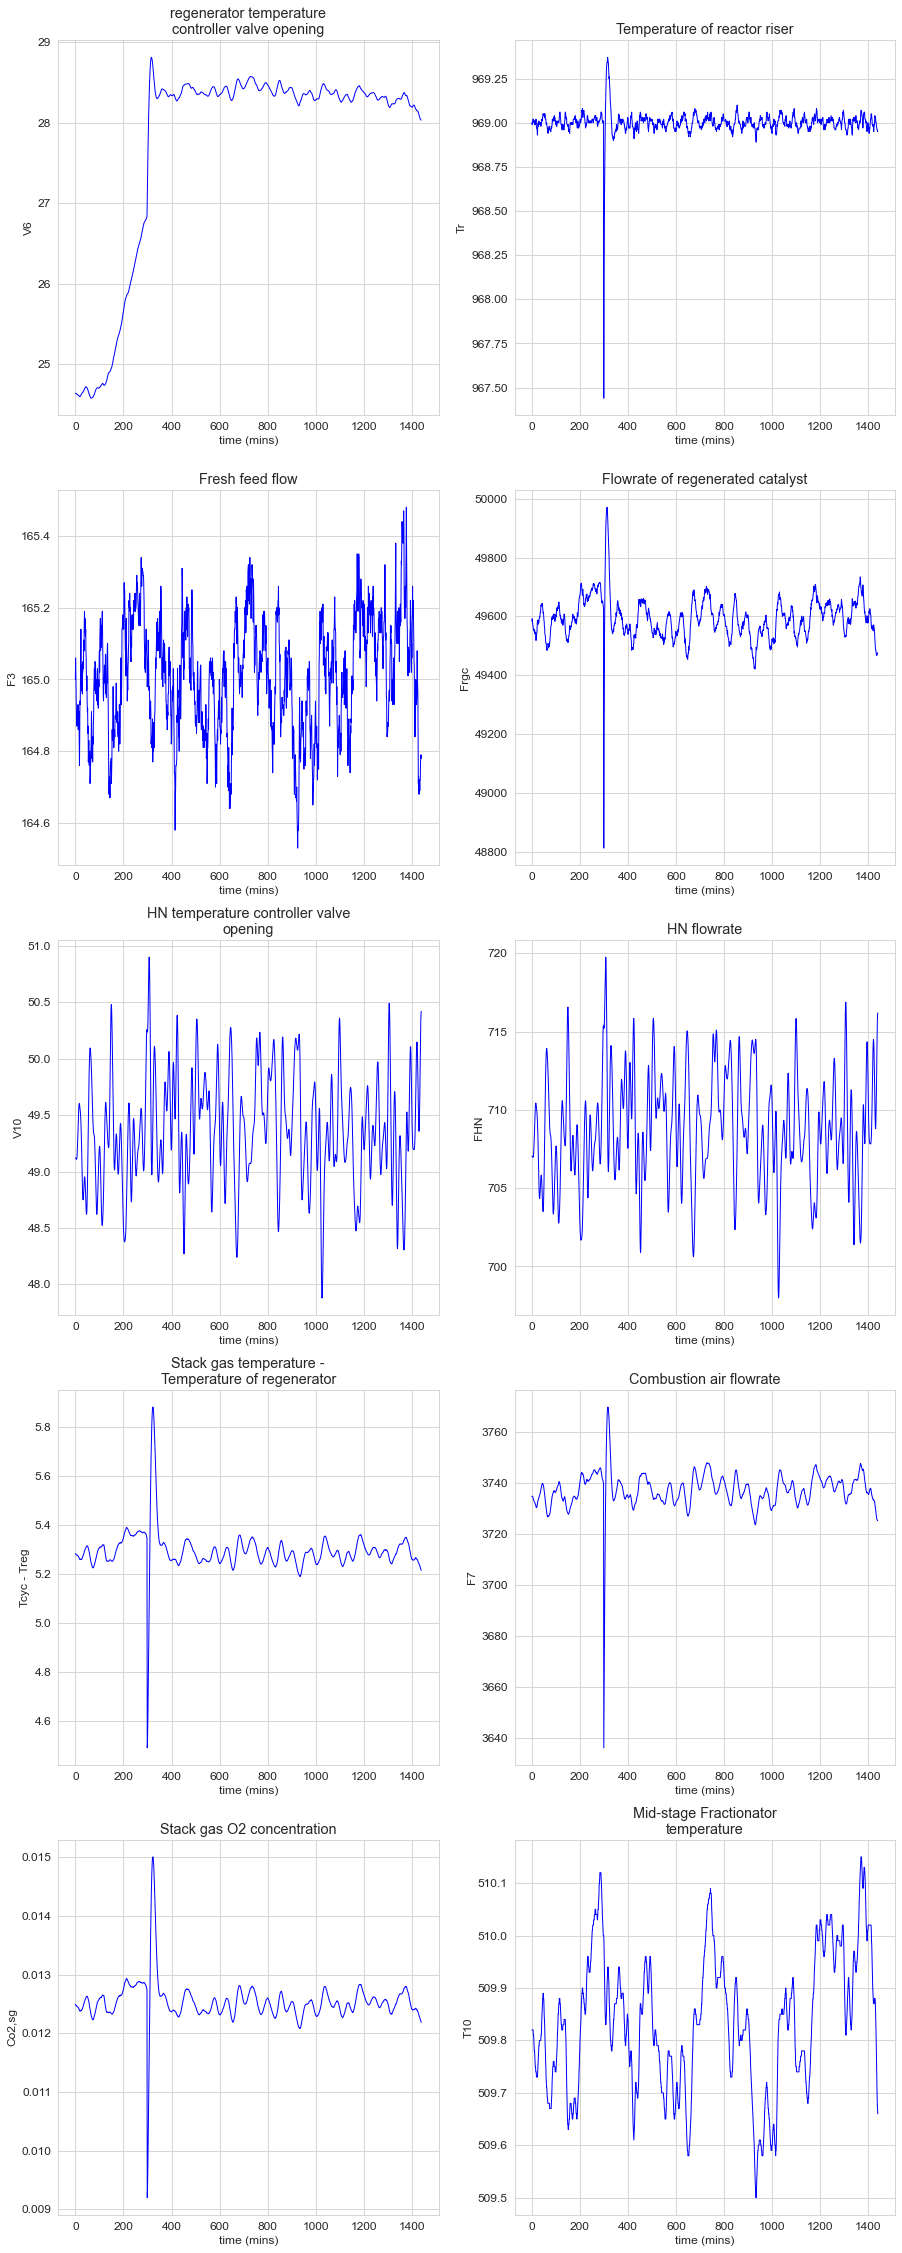

In [44]:
plt.figure(figsize=(15,40))
print('Time-',sample,'mins')
for i,n in enumerate(np.argsort(Q_contri)[:-11:-1]):
    plt.subplot(5,2,i+1)
    plt.plot(df_CAB_valveLeak.iloc[:,n],'blue', linewidth=1)
    plt.xlabel('time (mins)')
    plt.ylabel(df['Symbol'][n])
    plt.title(df['Description'][n])
    plt.show

Time- 299 mins


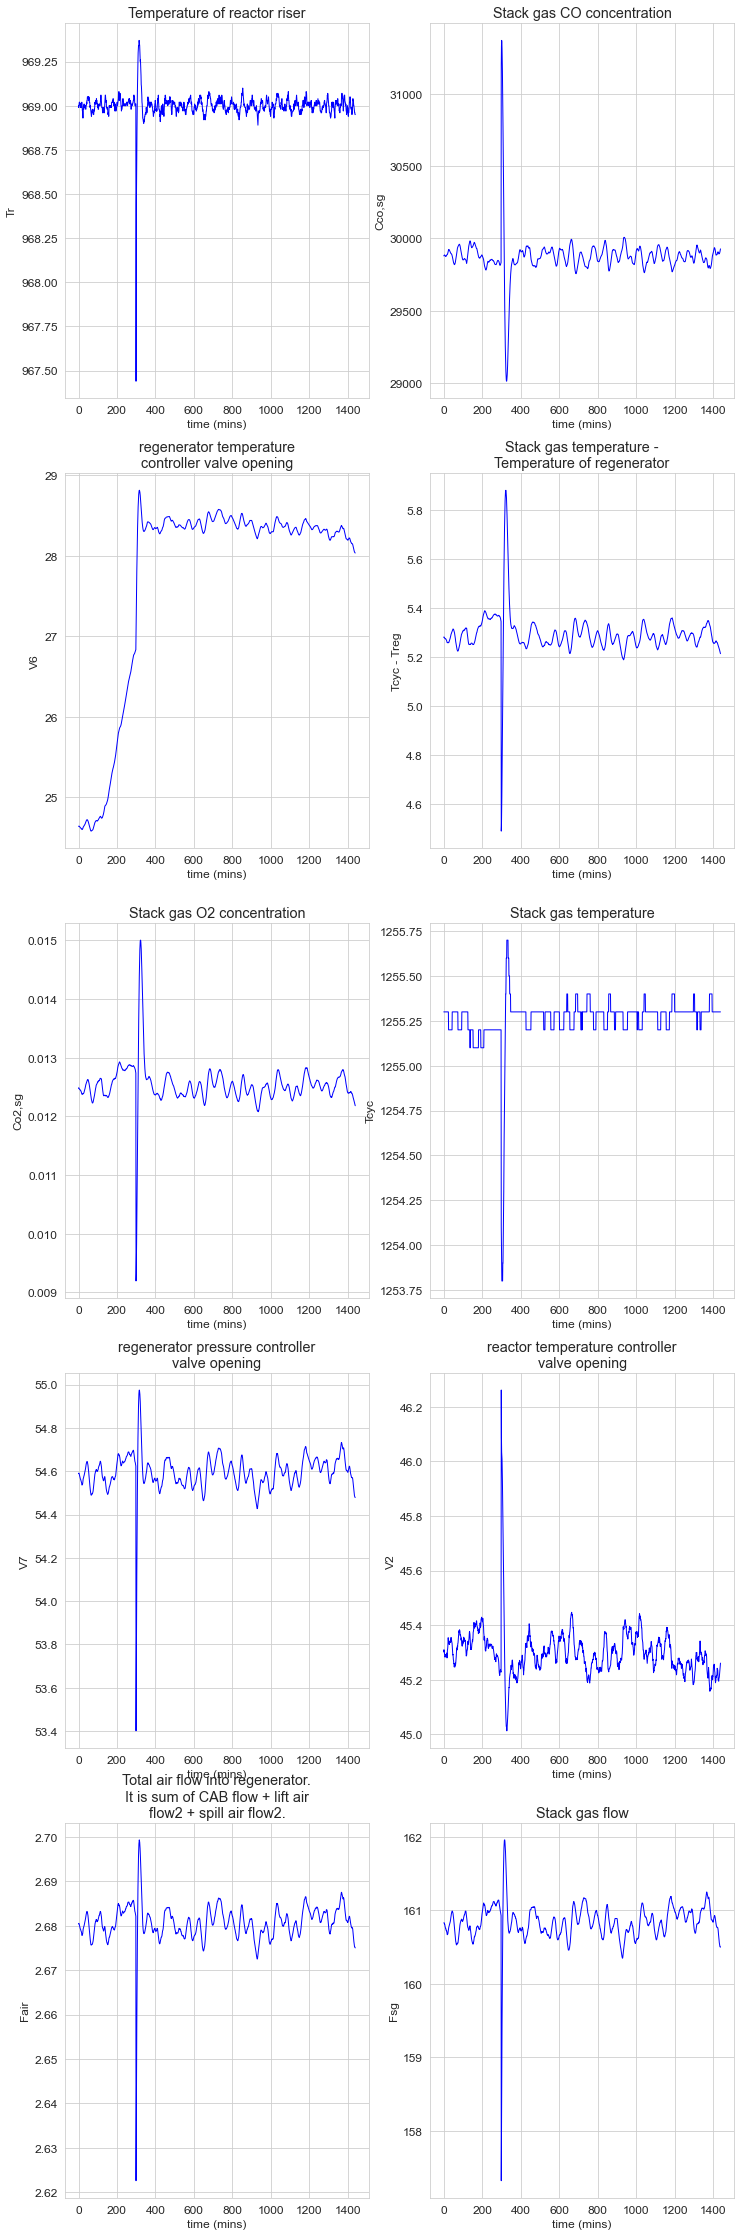

In [45]:
plt.figure(figsize=(12,40))
sample = ((pd.Series(error_ae.sum(axis=1))-pd.Series(error_ae.sum(axis=1)).shift()).abs()).argmax()
print('Time-',sample,'mins')
for i,n in enumerate(np.argsort(error_ae[sample])[:-11:-1]):
    plt.subplot(5,2,i+1)
    plt.plot(df_CAB_valveLeak.iloc[:,n],'blue', linewidth=1)
    plt.xlabel('time (mins)')
    plt.ylabel(df['Symbol'][n])
    plt.title(df['Description'][n])
    plt.show

# **Conclusion**
Regenerator temperature CV has suddenly increased which means there an abnormal situation where catalyst gets cooling and to maintain catalyst temperature air flow is increased.<br>
There is a possibility of behind the burn or air flow rate is decreased, since trends shows a stable catalyst flow and reactor temperature profile till 250 mins whereas air flow CV starts opening at 100 mins.